# Proyecto Flujo de Calor Cuenca Panamá

**Giovanny Alejandro Cuervo Londoño**
---
## Resumen

Varios son los autores que han tratado de esclarecer la evolución y geodinámica de la Cuenca Panamá, que por su complejidad y abundantes eventos superpuestos entorpecen su interpretación. Adicionalmente, la dificultad económica y logı́stica de  realizar muestreos directos, junto con el escaso interés estatal para estudiar las
áreas sumergidas colombianas, ha impedido el avance en esta discusión cientı́fica. De modo que, el Pacı́fico Colombiano permanece poco conocido y estudiado. Sin embargo, algunos estudios han dado grandes luces en
la comprensión del origen y evolución geológica de la Cuenca Van Andel et al. (1971); Lonsdale & Klitgord (1978); Meschede & Barckhausen (2000).



### Importamos Paquetes
---

In [ ]:
# Actualizamos scikit-learn a la última versión
!pip install -U scikit-learn 

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.2)


In [ ]:

# Importamos scikit-learn 
import sklearn
import numpy as np
import pandas as pd
#import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly
import plotly.express as px
# Visualización de grafos con graphviz.
import graphviz 

In [ ]:
print('Numpy', np.__version__)
print('Pandas', pd.__version__)
#print('Matplotlib', matplotlib.__version__)
print('Seaborn', sns.__version__)
#print('Ploty', plotly.__version__)
print('scikit-learn', sklearn.__version__)
print('graphviz', graphviz.__version__)

Numpy 1.19.5
Pandas 1.1.5
Seaborn 0.11.1
scikit-learn 0.24.2
graphviz 0.10.1


Los paquetes y vesiones utilizadas para la elaboración de este notebook fueron:

* Numpy 1.19.5
* Pandas 1.1.5
* Matplotlib 3.2.2
* Seaborn 0.11.1
* Ploty 4.4.1
* scikit-learn 0.24.2
* graphviz 0.10.1

### Funciones predefinidas
---

Definimos algunas funciones para grafiacar los datos

In [ ]:

def get_key(my_dict, val):
    for key, value in my_dict.items():
         if val == value:
             return key

def scatter_plt(var_x, var_y): 
  """
  Toma dos varaibles y las grafica con plt.
  
  """
  plt.scatter(df_Flujo_calor[f'{var_x}'], df_Flujo_calor[f'{var_y}'], s= 10, c='b', marker='o', alpha=0.2)
  plt.xlabel(f'{var_x}') 
  plt.ylabel(f"{var_y}") 
  plt.title(f"{var_x} vs {var_y}");

def scatter_ax(ax_n, var_x, var_y, bins= 20): 
  """
  toma un objeto ax de axis, y dos varaibles
  para definir una grafica un ax.plot
  """
  if var_x == var_y:
    ax_n.hist(df_Flujo_calor[f'{var_x}'], bins= bins, color='b')
    ax_n.set_xlabel(f'{var_x}') 
    ax_n.set_ylabel("frecuencia") 
    ax_n.set_title(f"{var_x}")
  else:
    ax_n.scatter(df_Flujo_calor[f'{var_x}'], df_Flujo_calor[f'{var_y}'], s= 10, c='b', marker='o', alpha=0.1)
    ax_n.set_xlabel(f'{var_x}') 
    ax_n.set_ylabel(f"{var_y}") 
    ax_n.set_title(f"{var_x} vs {var_y}")

def dictekeys(diccionario):
  """
  toma un diccionario: 
  {row1 : [(x1, y1), (x2, y2)], row2: [(x3, y3), (x4, y4)], ...}
  y retorna sus keys y 
  el mismo diccionario
  """
  plot = diccionario
  llaves = list(plot.keys())
  return plot, llaves 

def take_tuples_from_dict(plot, llaves):
  """
  Toma los objetos plot y llaves 
  de la función dictekeys()
  """
  lista_2plas = []
  for row in range(len([plot[key]for key in llaves])): #len =2
      for tupla in range(len([plot[key]for key in llaves][row])): #row1 y row2
        two_pla = [plot[key]for key in llaves][row][tupla] 
        lista_2plas.append(two_pla)
        
  return lista_2plas  

def define_plots(lista_2plas, llaves, plot, figsize): 
    """
    Toma el objeto lista_2plas de 
    la función take_tuples_from_dict(), 
    llaves y plot de la función dictekeys()
    y un figsize que es una tupla con 
    las dimensiones del gráfico
    """
    cols = len([plot[key]for key in llaves][0])
    filas = len(llaves)
    
    fig, axis = plt.subplots(filas, cols, figsize = figsize)
    
    if filas == 1:
      for ax, tupla in zip(axis, lista_2plas):
        scatter_ax(ax, tupla[0], tupla[1])
      fig.tight_layout();
    else:
      count = 0 
      for ax in axis:
        lista_2plas = lista_2plas[count:] 
        for idx, tupla in zip(range(len(ax)), lista_2plas):
          scatter_ax(ax[idx], tupla[0], tupla[1])
        count = cols 
        
      
      fig.tight_layout();

def sub_plots(diccionario, figsize, bins= 20):
  """
  toma un diccionario: 
  {row1 : [(x1, y1), (x2, y2)], row2: [(x3, y3), (x4, y4)], ...}
  y un figsize que es una tupla con las dimensiones del gráfico
  y aplica las funciones dictekeys(), take_tuples_from_dict() y
  define_plots()
  """
  plot, llaves = dictekeys(diccionario)
  lista_2plas = take_tuples_from_dict(plot, llaves)
  define_plots(lista_2plas, llaves, plot, figsize)

# Gráfica de la varianza explicada acumulada.

def cumulative_explained_variance_plot(expl_variance):

  cum_var_exp = np.cumsum(expl_variance)

  plt.figure(dpi = 100, figsize = (8, 6))
  plt.title('Curva acumulativa de la varianza explicada VS n° de componentes principales', 
            fontdict= dict(family ='serif', size = 16))
  plt.xlabel('Número de componentes principales',
             fontdict= dict(family ='serif', size = 14))
  plt.ylabel('Varianza explicada acumulativa',
             fontdict= dict(family ='serif', size = 14))  

  nc = np.arange(1, expl_variance.shape[0] + 1)

  plt.plot(nc, cum_var_exp, '--r')
  plt.plot(nc, cum_var_exp, 'c*', ms = 5)   
  plt.show()

def plot_PCA(pc1, pc2, pc3, pc4):
  fig, axis = plt.subplots(1, 2, figsize = (14, 7))
  ax0, ax1 = axis 
  ax0.scatter(pc1, pc2, s= 10, c='b', marker='o', alpha=0.2)
  ax0.set_xlabel('Componente principal 1')
  ax0.set_ylabel('Componente principal 2')
  ax0.vlines(0, min(pc2), max(pc2), colors='m', linestyles='dashed', label='PC 2')
  ax0.hlines(0, min(pc1), max(pc1), colors='m', linestyles='dashed', label='PC 1')

  ax1.scatter(pc3, pc4, s= 10, c='b', marker='o', alpha=0.2)
  ax1.set_xlabel('Componente principal 3')
  ax1.set_ylabel('Componente principal 4')
  ax1.vlines(0, min(pc4), max(pc4), colors='m', linestyles='dashed', label='PC 2')
  ax1.hlines(0, min(pc3), max(pc3), colors='m', linestyles='dashed', label='PC 1')

# Gracicar la curva de aprendizaje de determinada métrica de agrupamiento.

def plot_metric(K, scores, metric_name):
  plt.figure(dpi=80, figsize=(9, 5))
  plt.plot(K, scores, 'bx-')
  plt.xticks(K); plt.xlabel('$k$', fontdict=dict(family = 'serif', size = 14));  plt.ylabel(metric_name, fontdict=dict(family = 'serif', size = 14));
  plt.title(f'K vs {metric_name}', fontdict=dict(family = 'serif', size = 18))
  plt.show()

# Visualizar el resultado del agrupamiento con el algoritmo K-means para 8 valores de k.

from google.colab import widgets

def experiment_number_of_clusters(X, clustering, show_metric=None,
                                  plot_data=True, plot_centers=True, plot_boundaries=False):
    
    tb = widgets.TabBar([f'k = {k}'for k in range(2,15)])
    for i, n_clusters in enumerate(range(2,15)):
        with tb.output_to(i, select= (i < 1)):
          clustering.n_clusters = n_clusters
          y = clustering.fit_predict(X)

          cm = 'tab10'
          fig, ax = plt.subplots(figsize=(8, 6))
          plot_cluster_predictions(clustering, X, n_clusters, cm, 
                                  plot_data, plot_centers, show_metric, ax = ax)

# Gráfica individual del resultado de un agrupamiento.
from sklearn.metrics import silhouette_score 

def plot_cluster_predictions(clustering, X, n_clusters = None, cmap = 'tab10',
                             plot_data=True, plot_centers=True, show_metric=None,
                             title_str="", ax = None):

    # Ignoramos las advertencias o warnings.
    import warnings
    warnings.simplefilter(action='ignore')

    assert not hasattr(clustering, "n_clusters") or \
           (hasattr(clustering, "n_clusters") and n_clusters is not None), "must specify `n_clusters` for "+str(clustering)

    if n_clusters is not None:
        clustering.n_clusters = n_clusters

    y = clustering.fit_predict(X)
    # remove elements tagged as noise (cluster nb<0)
    X = X[y>=0]
    y = y[y>=0]

    if n_clusters is None:
        n_clusters = len(np.unique(y))
        
    if ax is None:
        ax = plt.gca()

    if plot_data:        
        sns.scatterplot(X[:,0], X[:,1], hue = y, palette=cmap, 
                        legend = False, alpha=.5 ,ax = ax, s = 40);

    if plot_centers and hasattr(clustering, "cluster_centers_"):
        sns.scatterplot(clustering.cluster_centers_[:,0],                         
                    clustering.cluster_centers_[:,1], hue = np.unique(y), s=180,  lw=3,
                    palette=cmap,
                    edgecolor="black", legend = False, ax = ax);   

    if show_metric is not None:
        if show_metric == 'inercia' and hasattr(clustering, 'inertia_'):
          inertia = clustering.inertia_
          ax.set_title("Inercia = {:.0f}".format(inertia)+ title_str, fontdict=dict(family = 'serif', size = 20))
        elif show_metric == 'silueta':          
          sc = silhouette_score(X, y) if len(np.unique(y)) > 1 else 0
          ax.set_title("Coeficiente de silueta = {:.3f}".format(sc)+ title_str, fontdict=dict(family = 'serif', size = 20))
    else:
        ax.set_title("k={}".format(n_clusters) +title_str, fontdict=dict(family = 'serif', size = 20))

    plt.axis("off")
    
    return

def plot_dendrogram(model_fit, tuple_figsize, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model_fit.children_.shape[0])
    n_samples = len(model_fit.labels_)
    for i, merge in enumerate(model_fit.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model_fit.children_, model_fit.distances_,
                                      counts]).astype(float)
    fig, axes = plt.subplots(1, 1, figsize= tuple_figsize)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, ax=axes, **kwargs)

# Función para visualizar la curva de aprendizaje a partir 
# del error de entrenamiento y de generalización.
def plot_learning_curve(train_error, generalization_error):
  n = len(train_error)
  if len(train_error) != len(generalization_error):
    print("Las secuencias de error de entrenamiento y generalización deben tener el mismo tamaño.")
    return

  balance_point = np.array(generalization_error).argmin() + 1
  plt.figure(figsize = (8, 5), dpi = 105)

  plt.plot(range(1, n + 1), train_error, label="Entrenamiento")
  plt.plot(range(1, n + 1), generalization_error, label="Generalización")
  plt.xticks(range(0, n + 1, 2))
  plt.xlabel("Profundidad máxima")
  plt.ylabel("Error")
  y_min, y_max = plt.gca().get_ylim() 
  plt.vlines(balance_point, y_min, y_max, colors = ['red'], linestyles = ['dashdot'])
  plt.ylim([y_min, y_max])
  plt.text(balance_point + 0.3, 0.065, 'Punto de balance')
  plt.legend();

# Función para visualizar la superficie de decisión de un clasificador.
def plot_decision_region(X, pred_fun, ax=None):
    min_x, max_x = np.min(X[:, 0]), np.max(X[:, 0])
    min_y, max_y = np.min(X[:, 1]), np.max(X[:, 1])
    
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05

    x_vals = np.linspace(min_x, max_x, 100)
    y_vals = np.linspace(min_y, max_y, 100)

    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape

    ZZ = np.zeros((grid_r, grid_c))

    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])    
            
    cs = ax.contourf(XX, YY, ZZ, 100, cmap = plt.cm.Pastel1, vmin = 0, vmax = np.max(ZZ)* 9. / (np.max(ZZ) + 1), alpha = 0.75)        
    ax.get_figure().colorbar(cs, ax=ax, )
    ax.set_xlabel("x")
    ax.set_ylabel("y")

#Función para generar la función de predicción de un clasificador entrenado previamente.
def gen_pred_fun(clf):
    def pred_fun(x1, x2):
        x = np.array([[x1, x2]])
        return clf.predict(x)[0]
    return pred_fun

# Función para visualizar un conjunto de datos de dos variables en un plano 2D.
def plot_data(X, y, model = None, ax = None, title=None):

    if ax is None:
      _, ax = plt.subplots(dpi = 110)

    if model is not None: 
      pred_fun = gen_pred_fun(model)
      plot_decision_region(X, pred_fun, ax)

    y_unique = np.unique(y)    
    df = pd.DataFrame({'x1': X[:,0], 'x2': X[:,1], 'Clases': y})
    sns.set_theme()
    sns.scatterplot(data = df, x = 'x1', y = 'x2', 
                    hue = 'Clases',style = 'Clases', ax = ax, palette = 'Set1').set_title(title)

def list_confusion_matrix(cm,classes):
  df = pd.DataFrame(data = cm,
                    index = pd.MultiIndex.from_product([['Valor real'], classes]),
                    columns = pd.MultiIndex.from_product([['Valor predicho'], classes]))
  
  return df

### Cargamos los Datos
---

In [ ]:
!wget 'https://raw.githubusercontent.com/gacuervol/heatflow/main/df_Flujo_calor3.csv'

--2021-05-14 19:06:02--  https://raw.githubusercontent.com/gacuervol/heatflow/main/df_Flujo_calor3.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 221958 (217K) [text/plain]
Saving to: ‘df_Flujo_calor3.csv’

df_Flujo_calor3.csv 100%[===================>] 216.76K  --.-KB/s    in 0.03s   

2021-05-14 19:06:02 (8.25 MB/s) - ‘df_Flujo_calor3.csv’ saved [221958/221958]



In [ ]:
df_Flujo_calor = pd.read_csv('df_Flujo_calor3.csv', index_col= 0)

In [ ]:
df_Flujo_calor = df_Flujo_calor.drop(['Clasificador', 'No_class'], axis=1) #quitamos estas columnas para no sesgar el clasificador más adelante
df_Flujo_calor.head()


Codigo       lon       lat  ...  No_etapa  Lister HFU  obs-teo HFU
0  27HF23 -86.86670  3.537222  ...         4    3.775901    -2.203176
1  28HF24 -86.99115  2.950989  ...         1    4.352858     2.024023
2  29HF25 -86.90680  2.720539  ...         1    4.940322     0.099086
3  31HF27 -87.01960  2.150989  ...         2    6.324555    -1.858350
4  32HF28 -87.05290  2.034306  ...         1    6.815542    -1.226815

[5 rows x 15 columns]

In [ ]:
df_Flujo_calor.shape #1049 observaciones y 15 varaibles

(1049, 15)

In [ ]:
df_Flujo_calor.describe().T

count         mean  ...          75%          max
lon                1049.0   -85.757219  ...   -83.762800   -78.266700
lat                1049.0     1.412637  ...     1.257500     7.916683
Profundidad        1049.0 -2958.185891  ... -2715.000000  -617.000000
Flujo_calor        1049.0   230.527979  ...   290.000000  1398.000000
HFU                1049.0     5.505803  ...     6.926200    33.389061
Pesos              1049.0     0.985246  ...     0.312549    31.898402
Flux_x_wts         1049.0   139.013952  ...    93.764686  6017.129536
Sed_thickness (m)  1049.0   156.141087  ...   269.000000   980.000000
Age (Ma)           1049.0     4.955005  ...     6.800000    47.100000
No_etapa           1049.0     6.168732  ...    10.000000    10.000000
Lister HFU         1049.0     6.298056  ...     7.442084    37.947332
obs-teo HFU        1049.0    -0.792253  ...     1.249655    26.460858

[12 rows x 8 columns]

## Entendimiento del Proyecto
---

Este proyecto tiene como objetivo explorar y descubrir nuevas y diferentes relaciones naturales entre los variables del conjunto de datos `df_Flujo_calor` a través de métodos de aprendizaje de máquina **no supervisados** para generar etiquetas para posteriormente aplicar **árboles de decisión** para determinar las variables determinante en la clasificación de estos datos y así encontrar nuevas y relevantes relaciones entre el *flujo de calor*, el *grosor sedimentario* y la *edad de la corteza oceánica* en la Cuenca Panamá. 

Ademas, debido a la naturaleza particular de estos datos es interesante explorar la sensibilidad de los algoritmos de aprendizaje de máquina no supervisados al sesgo espacial establecido por la distribución geográfica de los datos no es aleatoria ni tampoco es uniforme.  

## Entendimiento de los Datos
---
A partir de datos de Flujo de Calor, grosor sedimentario y edades de la corteza oceánica en la Cuenca Panamá, se realizó un 
tratamiento de datos utilizando el lenguaje de programación Python para luego emplear herramientas que permiten relacionar estas
tres variables y analizar su comportamiento. 

Los datos utilizados para este estudio fueron obtenidos del <a href="https://www.ihfc-iugg.org/products/global-heat-flow-database">Global Heat Flow Database</a>
y los utilizados en <a href="https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/93RG01249">Pollack, Hurter, & Johnson (1993)</a>  consultados el 22/09/2020; 
de estas bases de datos globales se descargaron los puntos comprendidos en un polı́gono con coordenadas 7.998877 N,
-76.603526 E, -2,766262 S, -102,882063 W (D WGS 1984 Datum).

Los datos de grosor sedimentario fueron obtenidos del <a href= "https://www.ngdc.noaa.gov/mgg/sedthick/"> Total Sediment Thickness of the World’s Oceans and Marginal Seas (Version 3 GlobSed)</a> 
Straume et al. (2019) y los datos de edades de la corteza Oceánica fueron obtenidos del 
<a href="https://www.ngdc.noaa.gov/mgg/ocean_age/ocean_age_2008.html"> Age, spreading rates and spreading symmetry of the world’s ocean crust (Version 3)</a> 
Müller et al. (2008) para el área comprendida en el estudio.

| Variable | Medida	| Valores | 
| --- | --- | --- |
| Codigo | 	id de pistoncore. |	categórica |
| lon |  coordenada longitud D WGS 1984 Datum | 	numérica 
| lat | coordenada latitud D WGS 1984 Datum 	| numérica |
| Profundidad |	metros bajo el nivel del mar 	| numérica |
| Flujo_calor |	Flujo de calor experimental $mW/m^2$ | numérica |
| HFU |	Heat Flow Unit $1 HFU = 41.86 mW/m^2$	| numérica |
| Pesos |	 Pesos por sesgo especial 	| numérica |
| Flux_x_wts |	Flujo_calor corregida para sesgo espacial  	| numérica |
| geometry |	Clase Point de geopandas 	| class |
| Sed_thickness (m) |	Grosor sedimentario en metros	| numérica |
| Age (Ma) |	Edad de la corteza en millones de años	| numérica |
| Etapa_termica  | Etapa térmica definida por Pollack (1993) 	| categórica|
| No_etapa |	Etapa_termica discretizada 	| categórica |
| Lister HFU |	Flujo de calor teórico derivado de la edad cortical en HFU 	| numérico |
| obs-teo HFU |	diferencia entre HFU - Lister HFU  	| numérico |




mapeamos geográficamente los  datos 

In [ ]:
fig = px.density_mapbox(df_Flujo_calor, lat='lat', lon='lon', z='Flujo_calor', radius=20,
                        center=dict(lat=2.5, lon=-86), zoom=5)
fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
some_numeric = ['lon','lat','Profundidad', 'Flujo_calor', 'Pesos', 'Flux_x_wts', 'Sed_thickness (m)', 'Age (Ma)', 'Lister HFU', 'obs-teo HFU']

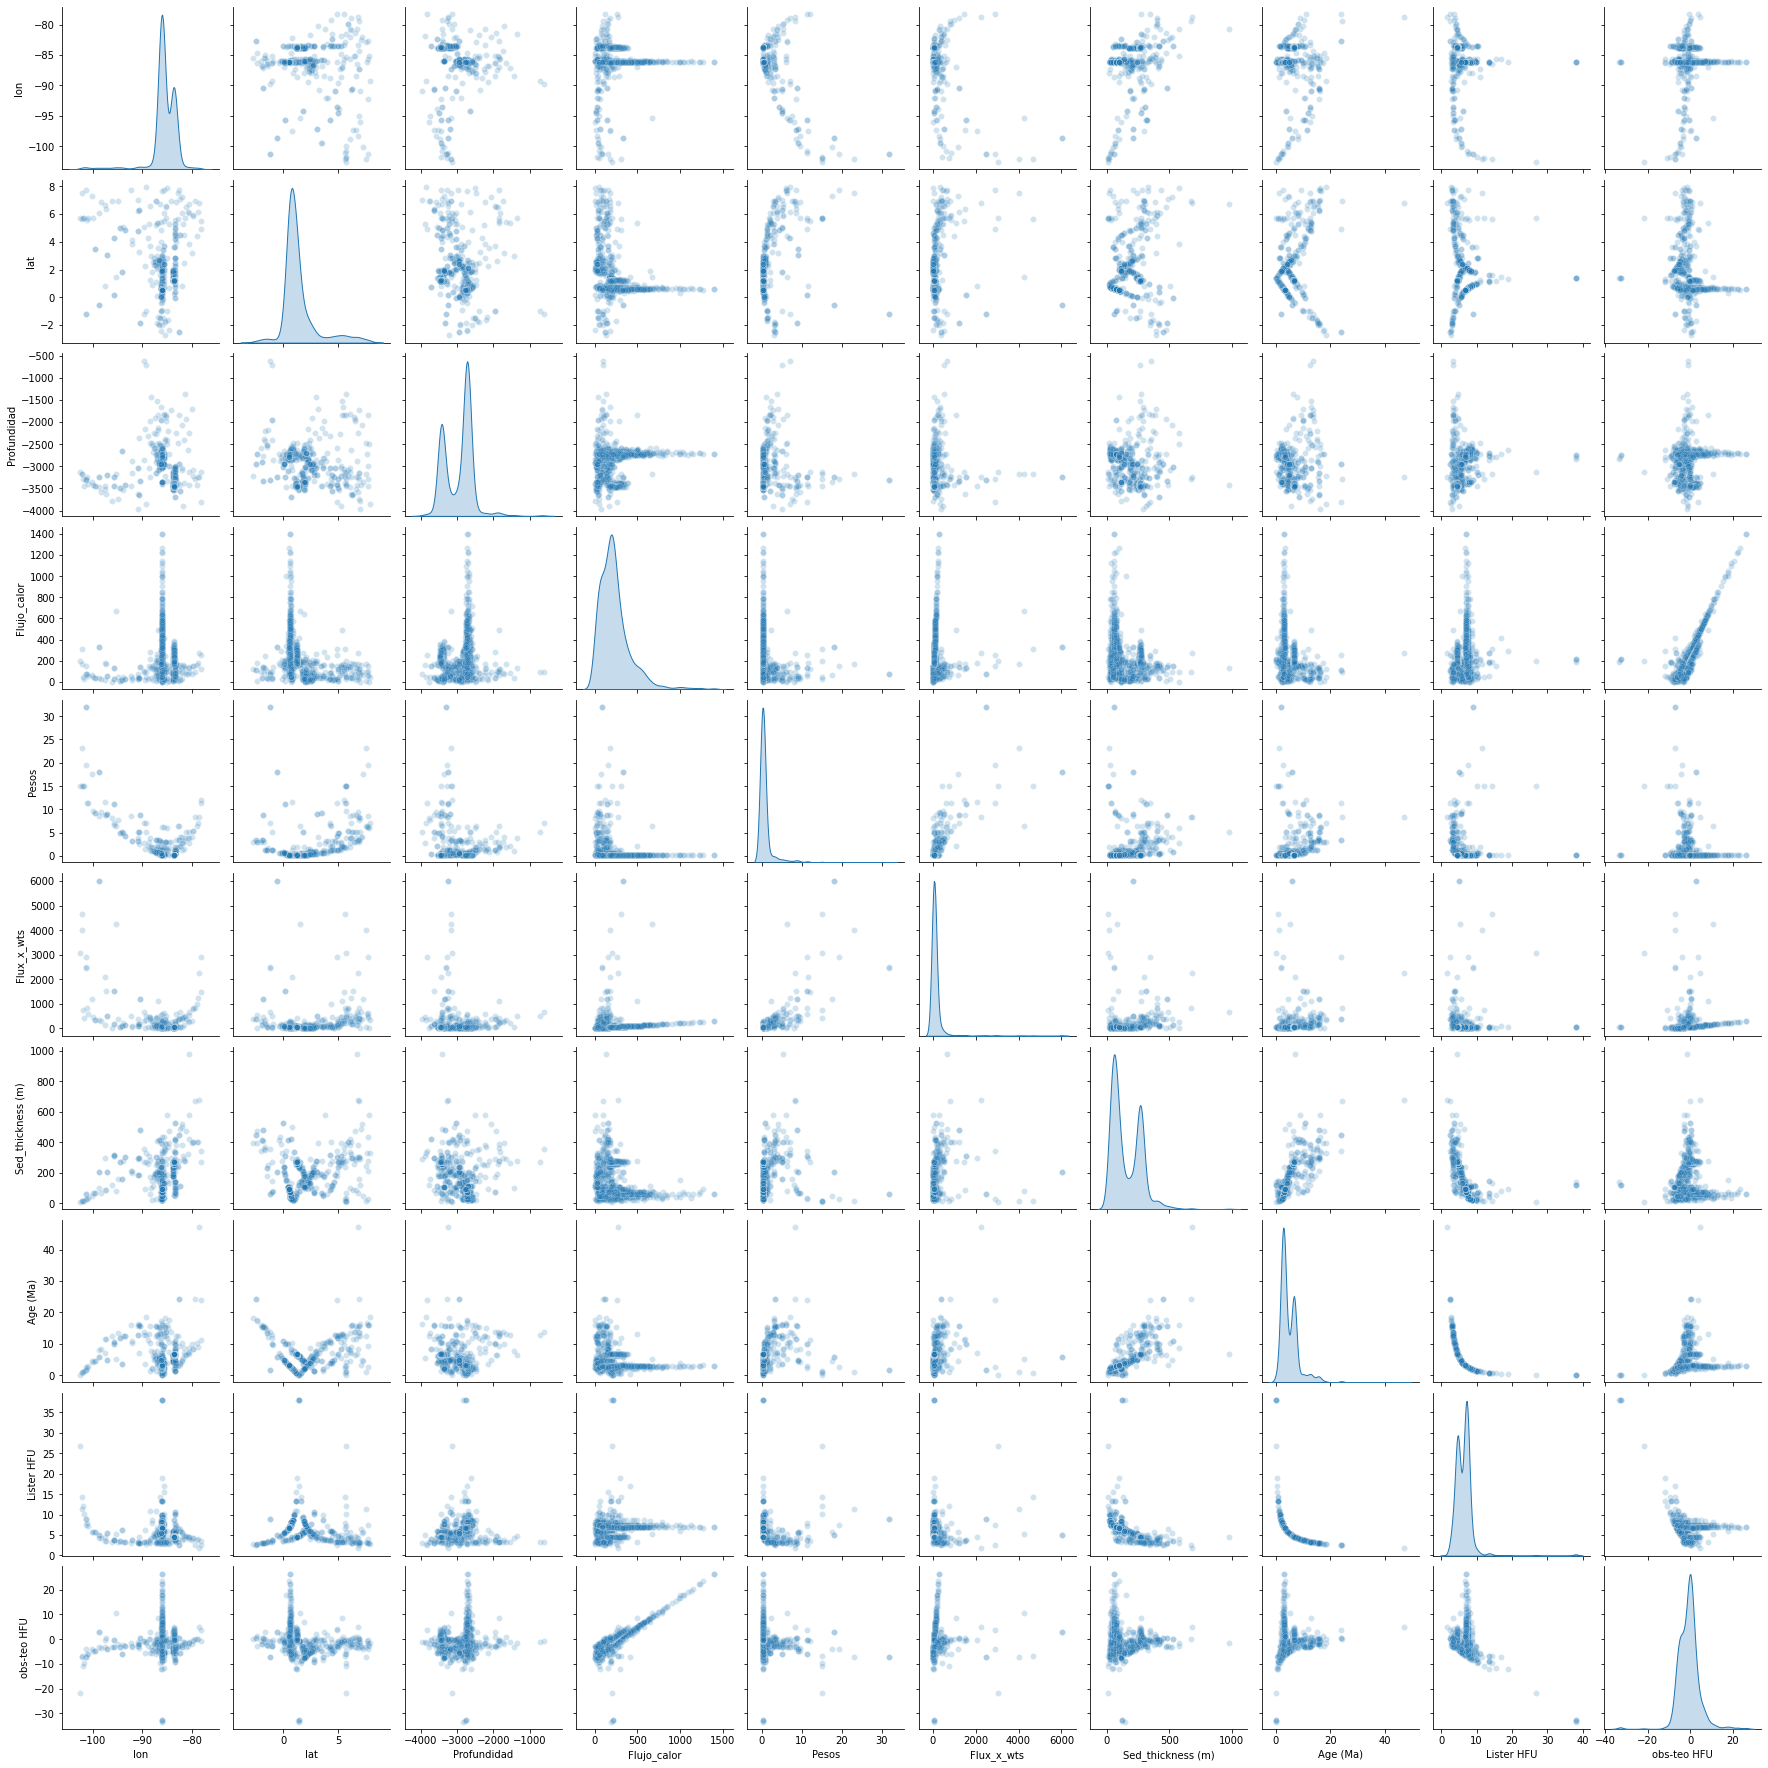

In [ ]:

sns.pairplot(df_Flujo_calor[some_numeric], diag_kind= 'kde', plot_kws={'alpha': 0.2});
#pd.plotting.scatter_matrix(df_Flujo_calor[some_numeric], alpha=0.9, figsize=(80, 80), diagonal='kde', marker='.');

En este pairplot se pueden observar varias relaciones interezantes entre las difenretes variables del conjunto de datos 

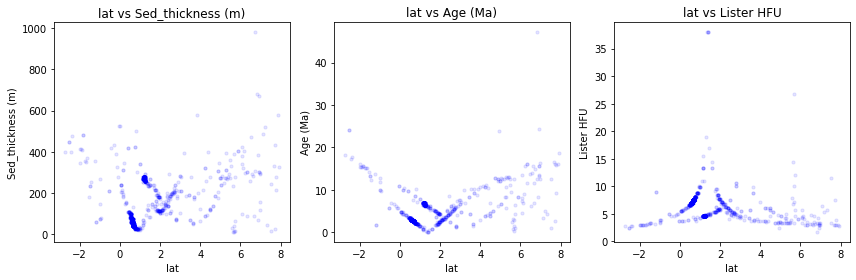

In [ ]:
diccionario = {'row1':[('lat', 'Sed_thickness (m)'),('lat', 'Age (Ma)'), ('lat', 'Lister HFU')]}

sub_plots(diccionario, (12,4))

Se observa claramente una relación no lineal entre la latitud `lat` y el grosor sedimentario `Sed_thickness (m)`, este comportamiento se evidencia también con las variables de `Age (Ma)` y `Lister HFU`.



Debido a que la variable de `Lister HFU` se deriva de la variable `Age (Ma)` mediante la siguiente relación definda por *Pollack et al. (1993)*:

$$q = 12 \frac{1}{\sqrt{t}}$$

Esta presenta una correlación con la variable `lat` o latitud. Ademas, es posible explicar esta correlación no lineal de las variables `Sed_thickness (m)` y `Age (Ma)` con la latitud se explica con la presencia de dos Rift orientados de norte a sur en 1.8° N y 3,6° N; el Rift de Galápagos y el Rift de Costa Rica.

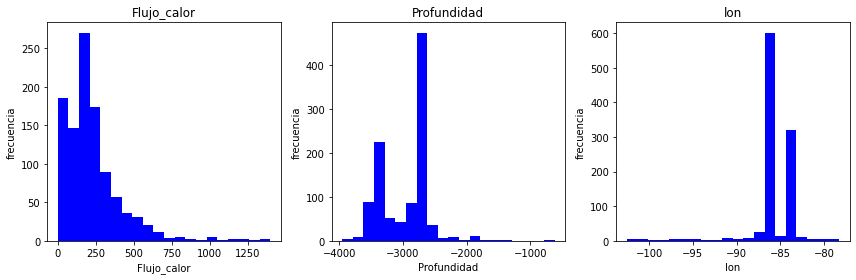

In [ ]:
diccionario = {'row1':[('Flujo_calor', 'Flujo_calor'),('Profundidad', 'Profundidad'), ('lon', 'lon')]}

sub_plots(diccionario, (12,4), bins= 50)

También es evidente la presencia marcada de dos dominios (bimodal) de gran densidad de puntos; que corresponden a dos regiones extensamente
muestreadas en cercanı́as de los centros de expansión de Galápagos y Costa rica.

Debido a que la distribución geográfica de los datos no es aleatoria ni tampoco es uniforme, es inevitable obtener un sesgo espacial, el cual tiende a sobrestimar
la media aritmética de los datos de Flujo de Calor, por esto se realizó una  corrección geoestadı́stica mediante
el método geoestadístico **Declustering**; el cual asigna pesos a cada una de las muestrar del conjunto de datos dependiendo de su densidad espacial.


Obteniendo así las varaibles `Pesos` y `Flux_x_wts`.

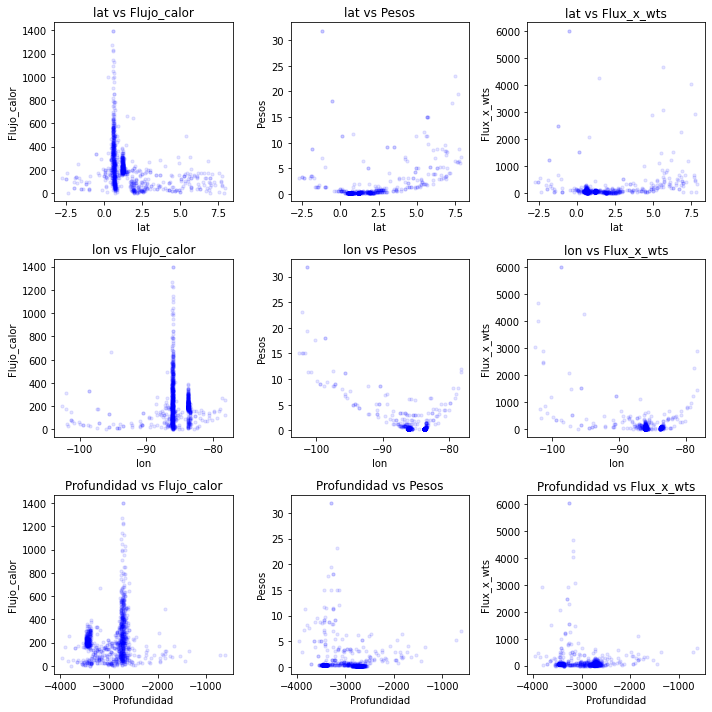

In [ ]:
diccionario = {'row1':[('lat', 'Flujo_calor'),('lat', 'Pesos'), ('lat', 'Flux_x_wts')],
               'row2':[('lon', 'Flujo_calor'),('lon', 'Pesos'), ('lon', 'Flux_x_wts')],
               'row3':[('Profundidad', 'Flujo_calor'),('Profundidad', 'Pesos'), ('Profundidad', 'Flux_x_wts')]}

sub_plots(diccionario, (10,10))

Se puede observar que los pesos más grandes son asignados a las muestras provenientes de zonas con menor densidad de muestreo y viceversa,  de manera que el sesgo espacial es evidentemente corregido por el método de declustering en términos de magnitud del Flujo de calor para las dos regiones más extensamente maestreadas 

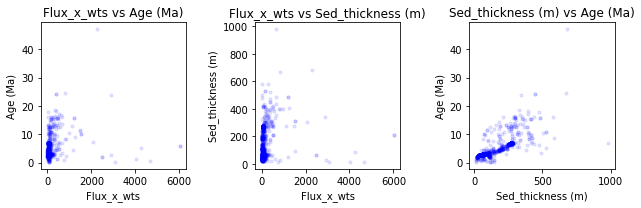

In [ ]:
diccionario = {'row1':[('Flux_x_wts', 'Age (Ma)'),('Flux_x_wts', 'Sed_thickness (m)'), ('Sed_thickness (m)', 'Age (Ma)')]}

sub_plots(diccionario, (9,3))

Al observar la variable de flujo de calor corregida en función de las otras variables de interés  es posible observar una de tipo no lineal (exponencial), esto no sería posible si los datos no hubiesen sido corregidos para sesgo espacial.

Para el análisis de correlación entre las variables se usa el método de Spearman  ρ , dado que las variables no presentan distribución normal y no presentan homogeneidad de varianzas.

In [ ]:
var2corr = ['Flujo_calor', 'Flux_x_wts', 'Age (Ma)', 'Sed_thickness (m)']
df_corr= df_Flujo_calor[var2corr].corr(method= 'spearman')
df_corr

Flujo_calor  Flux_x_wts  Age (Ma)  Sed_thickness (m)
Flujo_calor           1.000000    0.540238 -0.099010          -0.158766
Flux_x_wts            0.540238    1.000000  0.332362           0.233244
Age (Ma)             -0.099010    0.332362  1.000000           0.882394
Sed_thickness (m)    -0.158766    0.233244  0.882394           1.000000

Al observar la variable de flujo de calor corregida `Flux_x_wts` en función de las otras variables de interés es posible observar una distribución que se ajusta a alguna distribución de probabilidad tipo gamma, esto no sería posible si los datos no hubiesen sido corregidos para sesgo espacial. Ademas, a pesar de que la correlación entre el flujo de calor y las ademas variables no es lineal se puede observa que el coeficiente de correlación mejora después de haber realizado la corrección geoestadística; pasa de -0.099 y -0.159 a 0.332 0.233 para `Age (Ma)` y `Sed_thickness (m)` respectivamente, por otro lado es evidente que existe una correlación (0.882) de tipo lineal entre las variables de `Sed_thickness (m)` y `Age (Ma)`.

## Modelado
---
En esta etapa se buscará aplicar algoritmos de Reduccion de la Dimensionalidad pasa visulizar los el conjunto de datos y los posibles grupos existentes.

### Definimos dos Dataset
---

Un dataset con los valores de flujo de calor corregidos y otro sin correción geoestadística.

In [ ]:
df_No_correct = df_Flujo_calor.drop(['Codigo', 'geometry','Pesos', 'Flux_x_wts', 'Etapa_termica', 'No_etapa'], axis=1)
df_No_correct.head()

lon       lat  Profundidad  ...  Age (Ma)  Lister HFU  obs-teo HFU
0 -86.86670  3.537222      -2136.0  ...      10.1    3.775901    -2.203176
1 -86.99115  2.950989      -2870.0  ...       7.6    4.352858     2.024023
2 -86.90680  2.720539      -2690.0  ...       5.9    4.940322     0.099086
3 -87.01960  2.150989      -2824.0  ...       3.6    6.324555    -1.858350
4 -87.05290  2.034306      -2503.0  ...       3.1    6.815542    -1.226815

[5 rows x 9 columns]

In [ ]:
df_correct = df_Flujo_calor.drop(['Codigo', 'geometry','Pesos', 'Flujo_calor', 'Etapa_termica', 'No_etapa', 'HFU'], axis=1)
df_correct['HFU_x_wts'] = df_Flujo_calor['HFU']*df_Flujo_calor['Pesos']
df_correct.insert(4, 'HFU_x_wts',df_correct.pop('HFU_x_wts'))
df_correct['obs-teo HFU'] = (df_Flujo_calor['Flux_x_wts'].map(lambda x: x/41.86)) - df_Flujo_calor['Lister HFU']
df_correct.head()

lon       lat  Profundidad  ...  Age (Ma)  Lister HFU  obs-teo HFU
0 -86.86670  3.537222      -2136.0  ...      10.1    3.775901    -2.293676
1 -86.99115  2.950989      -2870.0  ...       7.6    4.352858     0.700559
2 -86.90680  2.720539      -2690.0  ...       5.9    4.940322    -0.946798
3 -87.01960  2.150989      -2824.0  ...       3.6    6.324555    -3.373095
4 -87.05290  2.034306      -2503.0  ...       3.1    6.815542    -3.122271

[5 rows x 9 columns]

### Escalado del Dataset

#### Dataset no corregido scale
---
`X_No_correct_sc`

In [ ]:
# Preprocesamiento (Reescalado estándar)
from sklearn.preprocessing import StandardScaler
Scale = StandardScaler()
X_No_correct_sc = Scale.fit_transform(df_No_correct.values)
pd.DataFrame(X_No_correct_sc, columns=['lon',	'lat',	'Profundidad',	'Flujo_calor',	'HFU',	'Sed_thickness (m)',	'Age (Ma)',	'Lister HFU',	'obs-teo HFU'], ).describe().T

count          mean  ...       75%        max
lon                1049.0  2.663689e-15  ...  0.702995   2.640265
lat                1049.0  3.695804e-16  ... -0.097028   4.067868
Profundidad        1049.0  2.564414e-16  ...  0.625396   6.020779
Flujo_calor        1049.0  9.207760e-18  ...  0.315922   6.201747
HFU                1049.0  1.385397e-16  ...  0.315922   6.201747
Sed_thickness (m)  1049.0 -7.608573e-16  ...  0.968227   7.067961
Age (Ma)           1049.0 -6.138507e-18  ...  0.515883  11.784249
Lister HFU         1049.0 -9.544584e-16  ...  0.417189  11.541426
obs-teo HFU        1049.0  1.397039e-17  ...  0.407090   5.433388

[9 rows x 8 columns]

#### Dataset corregido scale
---
`X_correct_sc`

In [ ]:
Scale = StandardScaler()
X_correct_sc = Scale.fit_transform(df_correct.values)
print(X_correct_sc.shape)
pd.DataFrame(X_correct_sc, columns=['lon',	'lat',	'Profundidad',	'Flux_x_wts',	'HFU_x_wts',	'Sed_thickness (m)',	'Age (Ma)',	'Lister HFU',	'obs-teo HFU'], ).describe().T

(1049, 9)


count          mean  ...       75%        max
lon                1049.0  2.663689e-15  ...  0.702995   2.640265
lat                1049.0  3.695804e-16  ... -0.097028   4.067868
Profundidad        1049.0  2.564414e-16  ...  0.625396   6.020779
Flux_x_wts         1049.0  1.016029e-17  ... -0.105433  13.696303
HFU_x_wts          1049.0  1.989723e-17  ... -0.105433  13.696303
Sed_thickness (m)  1049.0 -7.608573e-16  ...  0.968227   7.067961
Age (Ma)           1049.0 -6.138507e-18  ...  0.515883  11.784249
Lister HFU         1049.0 -9.544584e-16  ...  0.417189  11.541426
obs-teo HFU        1049.0 -6.646521e-17  ... -0.010852  13.371362

[9 rows x 8 columns]

### PCA

#### PCA no corregido scale
---
`X_No_correct_sc`

In [ ]:
from sklearn.decomposition import PCA

# Si no se indica el número de componentes se usa la cantidad de columnas.
pca = PCA() 
X_Latente = pca.fit_transform(X_No_correct_sc)

varianza_expl = pca.explained_variance_ratio_

print('X_No_correct_sc')
print(f'Componentes principales: {len(varianza_expl)}')
print(f'Varianza explicada por cada componente principal: \n{varianza_expl}')
print(f'\nVarianza acumulada: \n{sum(varianza_expl)}')

X_No_correct_sc
Componentes principales: 9
Varianza explicada por cada componente principal: 
[3.54968859e-01 2.87553394e-01 1.25084220e-01 8.89507465e-02
 7.40049419e-02 5.22087405e-02 1.72290979e-02 1.22222281e-32
 3.97985722e-33]

Varianza acumulada: 
0.9999999999999999


**En el caso del dataset sin correción**

La varainza explicada por cada componente:
* 1 pc: 35.5 %
* 2 pc: 28.7 %
* 3 pc: 12.5%
* 4 pc: 8.9 % 

X_No_correct_sc


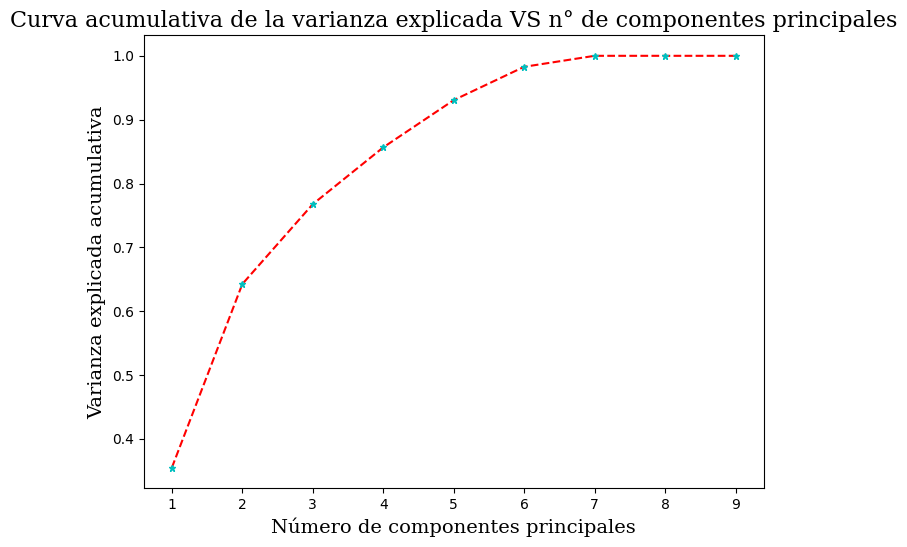

In [ ]:
print('X_No_correct_sc')
cumulative_explained_variance_plot(varianza_expl)

X_No_correct_sc


(1049, 9)

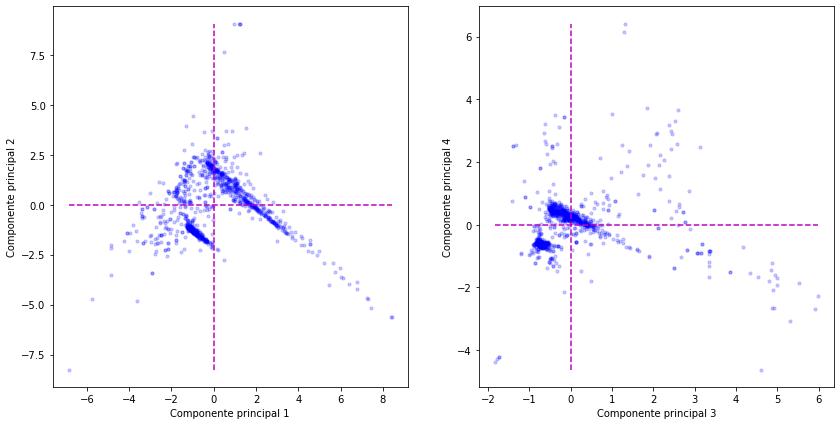

In [ ]:
plot_PCA(X_Latente[:, 0], X_Latente[:, 1], X_Latente[:, 2], X_Latente[:, 3])

print('X_No_correct_sc')
X_Latente.shape

Visualizando el espacio latente de los primeros 4 componentes principales es evidente la presencia marcada de dos dominios, correspondientes a las zonas más extensamente muestreadas

#### PCA corregido scale
---
`X_correct_sc`

In [ ]:
# Si no se indica el número de componentes se usa la cantidad de columnas.
pca = PCA() 
Xc_Latente = pca.fit_transform(X_correct_sc)

varianza_expl_c = pca.explained_variance_ratio_

print('X_correct_sc', 'shape:' , X_correct_sc.shape)
print(f'Componentes principales: {len(varianza_expl_c)}')
print(f'Varianza explicada por cada componente principal: \n{varianza_expl_c}')
print(f'\nVarianza acumulada: \n{sum(varianza_expl_c)}')

X_correct_sc shape: (1049, 9)
Componentes principales: 9
Varianza explicada por cada componente principal: 
[3.94690130e-01 2.84166863e-01 1.01092019e-01 9.03127265e-02
 6.71097764e-02 4.55358278e-02 1.70926577e-02 1.20936960e-32
 4.21795274e-33]

Varianza acumulada: 
0.9999999999999998


**En el caso del dataset con correción**

La varainza explicada por cada componente:

* 1 pc: 39.5 %
* 2 pc: 28.4 %
* 3 pc: 10.1 %
* 4 pc: 9 %

X_correct_sc


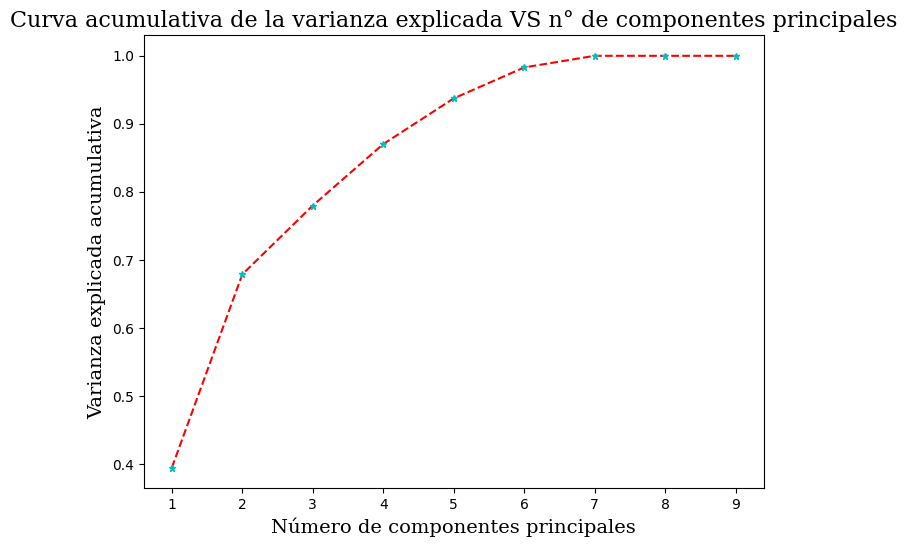

In [ ]:
print('X_correct_sc')
cumulative_explained_variance_plot(varianza_expl_c)

X_correct_sc


(1049, 9)

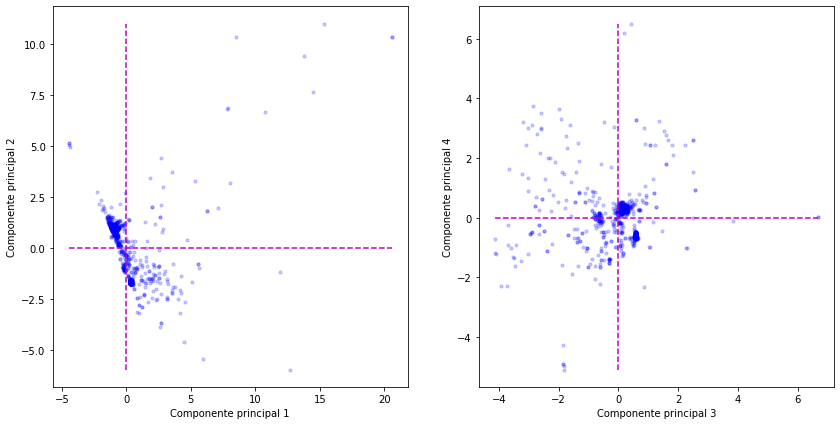

In [ ]:
plot_PCA(Xc_Latente[:, 0], Xc_Latente[:, 1], Xc_Latente[:, 2], Xc_Latente[:, 3])

print('X_correct_sc')
Xc_Latente.shape

Para el caso de los datos corregidos es menos evidente y distinguible la presencia de los dos dominios anteriormente señalados, sin embargo se puede observar zonas de mayor densidad.

### Clustering
---

Usaremos algoritmos de agrupamiento para encontrar grupos de datos, con caracteristicas similares y explorar la sensibilidad del modelo a datos con sesgo espacial y datos con corregidos.


```KMeans(n_clusters=i, random_state= 31, init='random')```

aquí faltó el atributo ```init='random'```

#### Evaluación interna (No supervisada)

##### Dataset no corregido

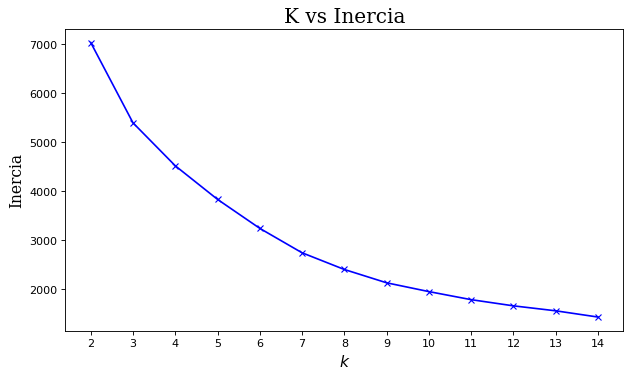

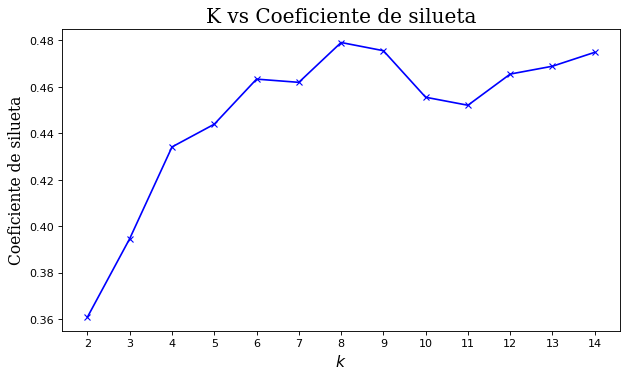

In [ ]:
# Métodos de agrupamiento - Algoritmo K-means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette = []
K = range(2, 15)
for i in K:
  # Declaramos y ejecutamos el algoritmo K-means.
  model = KMeans(n_clusters=i, random_state= 31)
  model.fit(X_No_correct_sc)

  # Predecimos las etiquetas de X_No_correct_sc.
  y_etiquetas = model.predict(X_No_correct_sc)

  # Almacenamos la métrica de inercia y el coeficiente de silueta.
  inertia.append(model.inertia_)
  silhouette.append(silhouette_score(X_No_correct_sc, y_etiquetas))
  

plot_metric(K, inertia, 'Inercia')
plot_metric(K, silhouette, 'Coeficiente de silueta')

Según la evaluación interna del modelo kmeans, el Coeficiente de Silueta muestra como mejor valor de k = 8,  mientras que con la métrica de inercia se puede definir como buenos valores de k=8 o 9

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

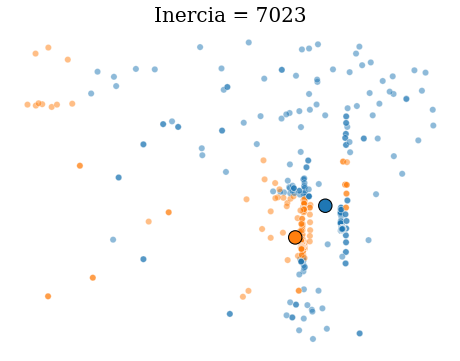

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

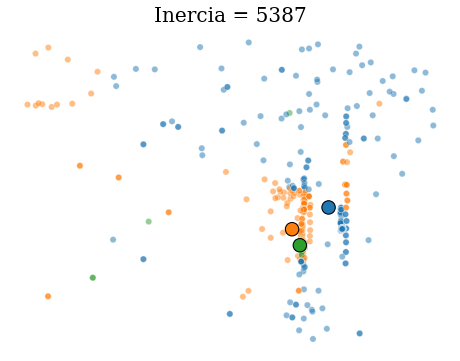

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

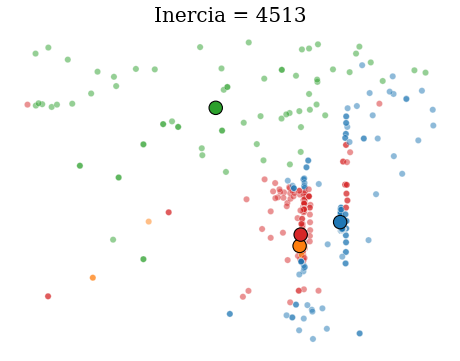

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

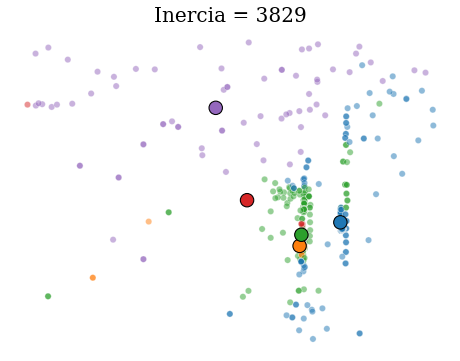

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

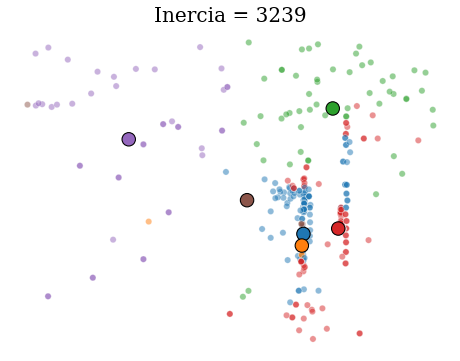

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

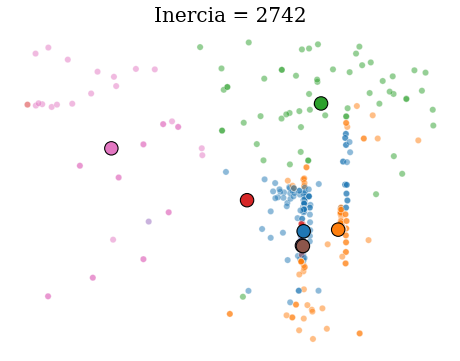

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

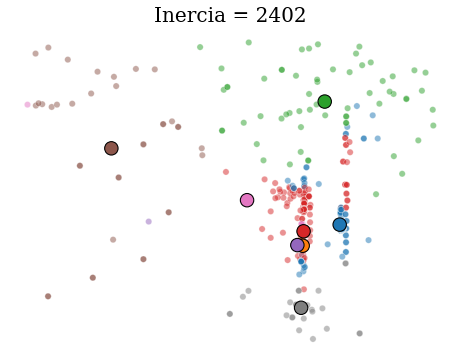

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

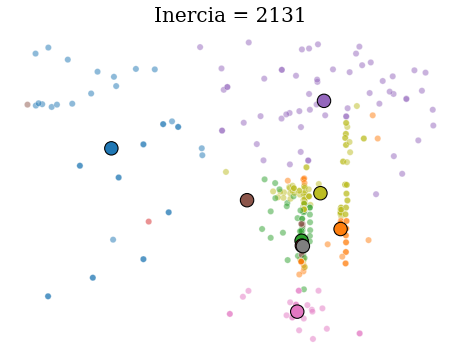

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

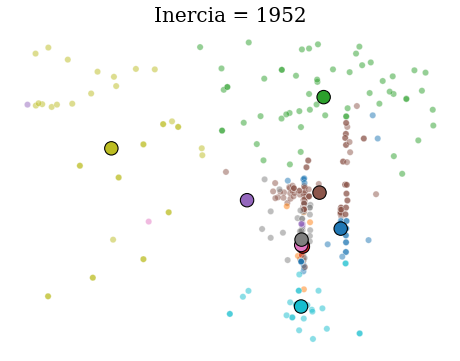

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

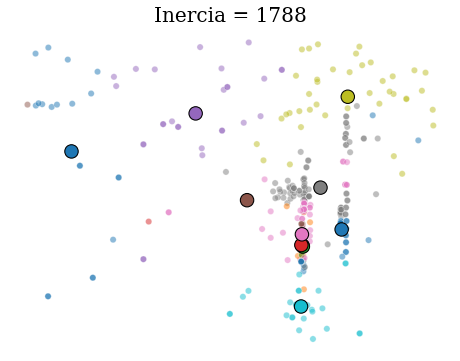

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

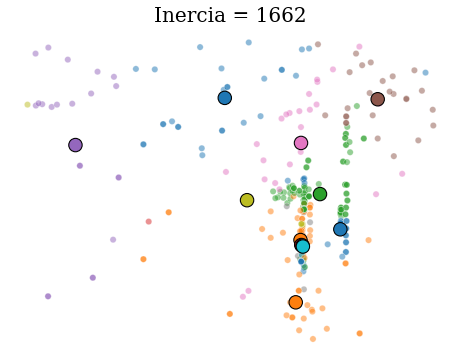

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

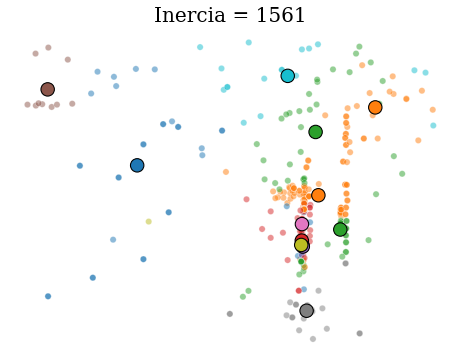

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

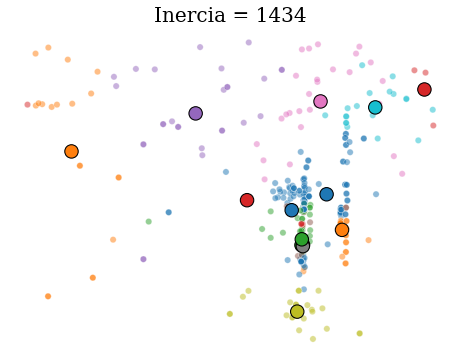

<IPython.core.display.Javascript object>

In [ ]:
experiment_number_of_clusters(X_No_correct_sc, KMeans(random_state= 31), show_metric='inercia');

X_No_correct_sc: k = 8


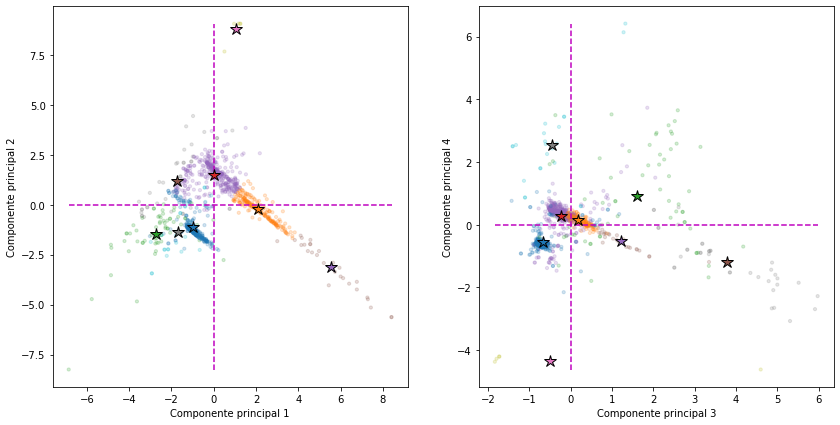

In [ ]:
model = KMeans(n_clusters=8, random_state= 31)
# Predecimos las etiquetas de cada cluster para X_No_correct_sc.
y_etiquetas = model.fit_predict(X_No_correct_sc)
centroids = model.cluster_centers_
# convetimos los centroide al espacio latente para graficarlos
pca = PCA().fit(X_No_correct_sc) 
centroids_latent = pca.transform(centroids)

print('X_No_correct_sc: k = 8')
X_Latente.shape

fig, axis = plt.subplots(1, 2, figsize = (14, 7))
ax0, ax1 = axis 

ax0.scatter(X_Latente[:, 0], X_Latente[:, 1], s= 10, c= y_etiquetas, marker='o', alpha=0.2, cmap= 'tab10')
ax0.set_xlabel('Componente principal 1')
ax0.set_ylabel('Componente principal 2')
ax0.vlines(0, min(X_Latente[:, 1]), max(X_Latente[:, 1]), colors='m', linestyles='dashed', label='PC 2')
ax0.hlines(0, min(X_Latente[:, 0]), max(X_Latente[:, 0]), colors='m', linestyles='dashed', label='PC 1')
for i in range(len(centroids_latent)):
  ax0.plot(centroids_latent[i][0], centroids_latent[i][1], '*', mec='k', markersize=12)

ax1.scatter(X_Latente[:, 2], X_Latente[:, 3], s= 10, c= y_etiquetas, marker='o', alpha=0.2, cmap= 'tab10')
ax1.set_xlabel('Componente principal 3')
ax1.set_ylabel('Componente principal 4')
ax1.vlines(0, min(X_Latente[:, 3]), max(X_Latente[:, 3]), colors='m', linestyles='dashed', label='PC 2')
ax1.hlines(0, min(X_Latente[:, 2]), max(X_Latente[:, 2]), colors='m', linestyles='dashed', label='PC 1')
for i in range(len(centroids_latent)):
  ax1.plot(centroids_latent[i][2], centroids_latent[i][3], '*', mec='k', markersize=12)


Se puede observar que los centroides se aglomeran en las zonas con mayor densidad de muestreo ademas es posible observar que debido a la naturaleza No globular de los cluster el algoritmo no logra modelar bien los clusters alargados de data set.

Dado a que en el espacio latente las zonas de mayor muestreo presentan una geometría alargada el algoritmo kmeans falla al asignar tres centroides a un mismo cluster alargado.

##### Dataset corregido

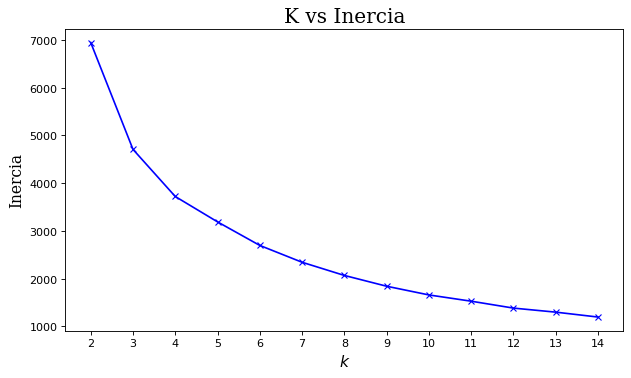

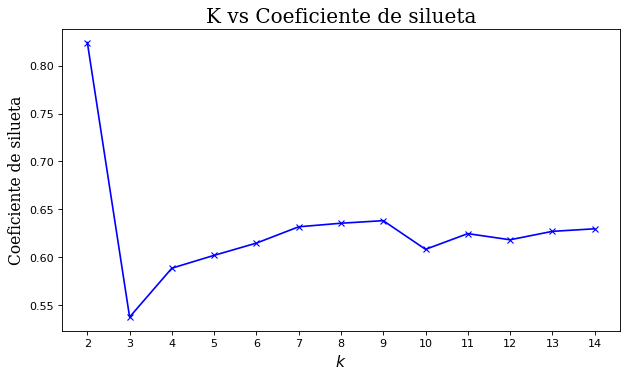

In [ ]:
inertia = []
silhouette = []
K = range(2, 15)
for i in K:
  # Declaramos y ejecutamos el algoritmo K-means.
  model = KMeans(n_clusters=i, random_state= 31)
  model.fit(X_correct_sc)

  # Predecimos las etiquetas de X_correct_sc.
  y_etiquetas = model.predict(X_correct_sc)

  # Almacenamos la métrica de inercia y el coeficiente de silueta.
  inertia.append(model.inertia_)
  silhouette.append(silhouette_score(X_correct_sc, y_etiquetas))
  

plot_metric(K, inertia, 'Inercia')
plot_metric(K, silhouette, 'Coeficiente de silueta')

Según la curva de inercia los mejores valores de k= 8 o 9, mientras que para el coeficiente de silueta el mejor valor es k= 2, sin embargo, el segundo valor optimo de k según el mismo indicador es k = 9, el cual coincide con lo sugerido por la curva de inercia.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

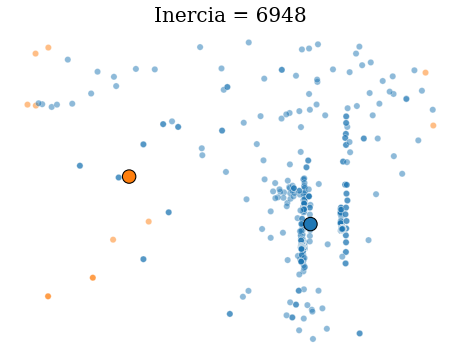

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

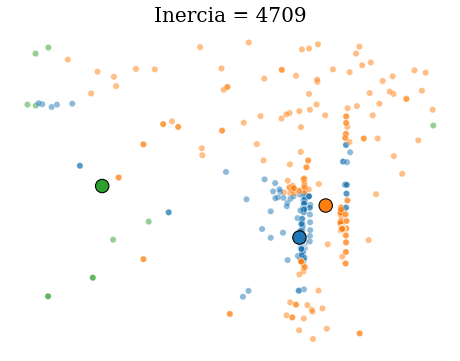

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

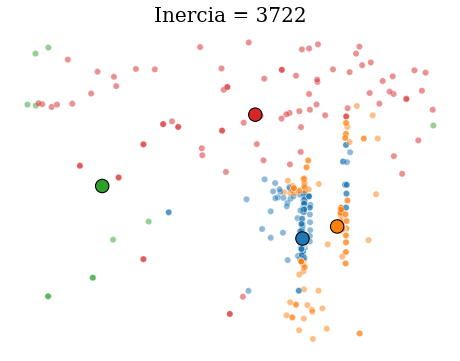

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

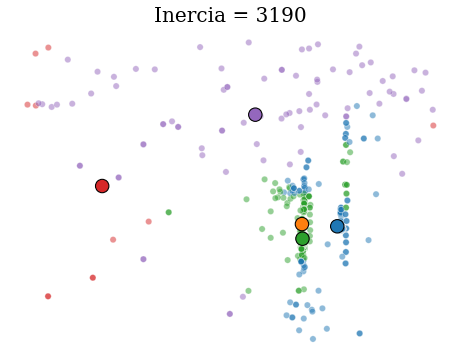

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

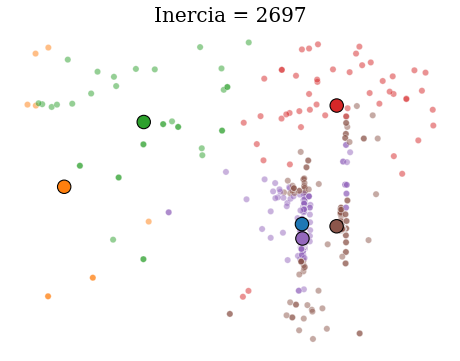

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

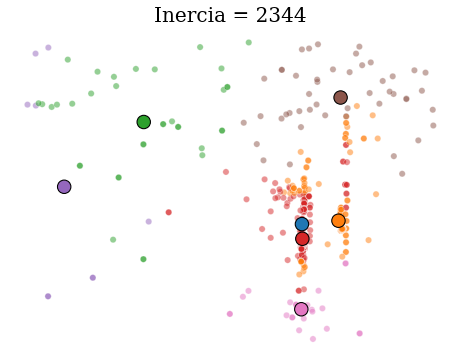

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

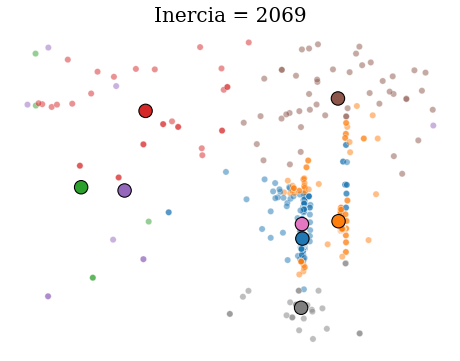

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

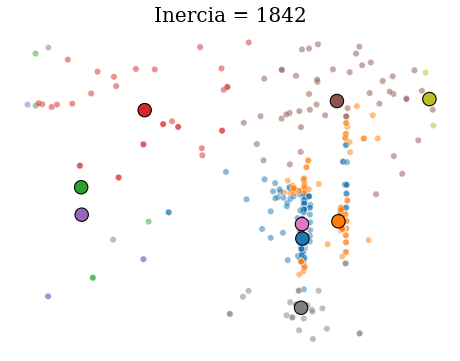

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

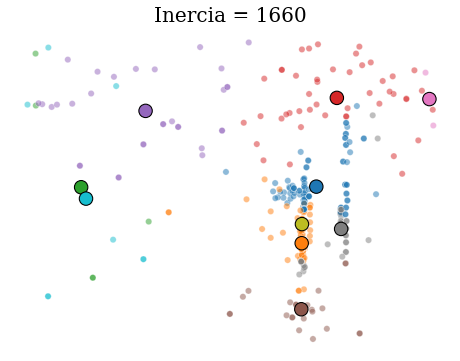

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

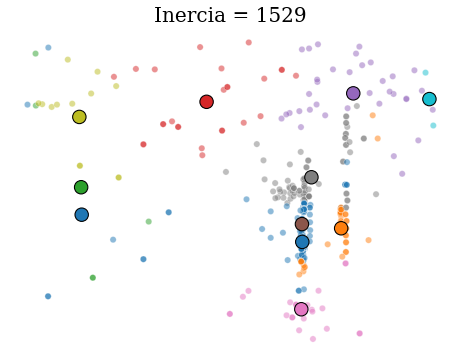

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

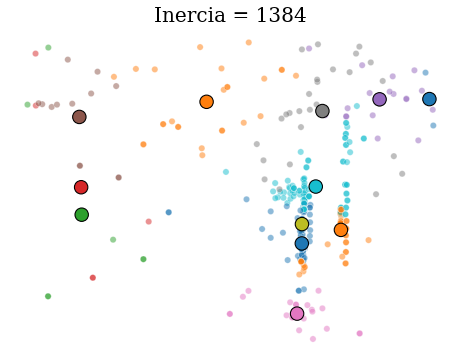

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

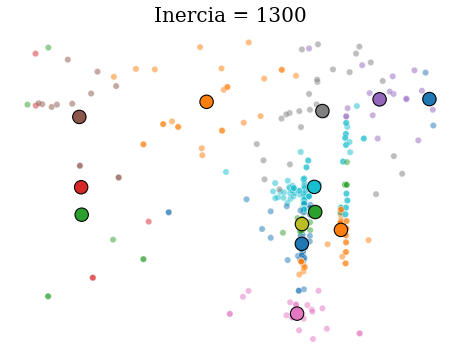

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

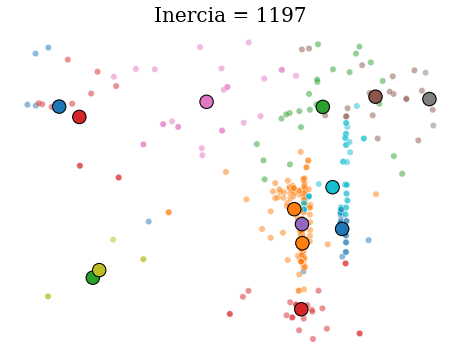

<IPython.core.display.Javascript object>

In [ ]:
experiment_number_of_clusters(X_correct_sc, KMeans(random_state= 31), show_metric='inercia');

In [ ]:
#sacamos las etiquetas de cada cluster
model = KMeans(n_clusters=9, random_state= 31)
# Predecimos las etiquetas de X_correct_sc.
y_etiquetas_cr = model.fit_predict(X_correct_sc)
centroids = model.cluster_centers_
print('shape centroids',centroids.shape)
#convertimos los centroides al espacio latente para poder visualizarlos
pca = PCA().fit(X_correct_sc) 
centroids_latent = pca.transform(centroids)

shape centroids (9, 9)


In [ ]:
print('shape etiquetas',y_etiquetas_cr.shape)
print('shape centroids_latent', centroids_latent.shape)


shape etiquetas (1049,)
shape centroids_latent (9, 9)


In [ ]:
centroids == centroids_latent #no son lo mismo

array([[False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False]])

X_correct_sc: k = 9


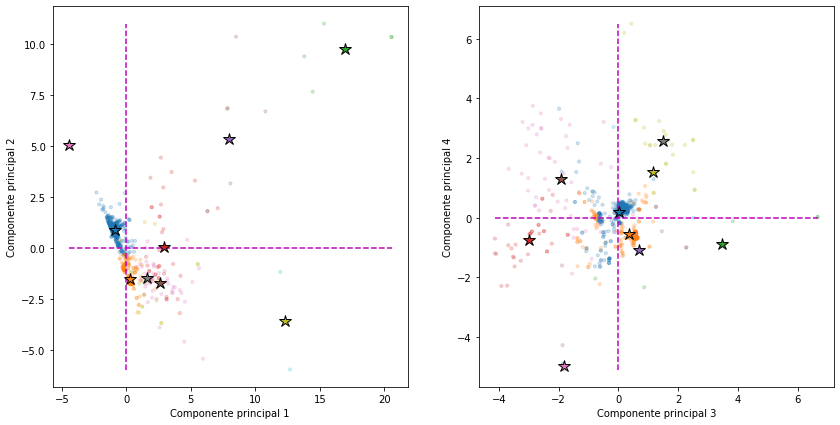

In [ ]:
#sacamos las etiquetas de cada cluster
model = KMeans(n_clusters=9, random_state= 31)
# Predecimos las etiquetas de X_correct_sc.
y_etiquetas_cr = model.fit_predict(X_correct_sc)
centroids = model.cluster_centers_

#convertimos los centroides al espacio latente para poder visualizarlos
pca = PCA().fit(X_correct_sc) 
centroids_latent = pca.transform(centroids)

print('X_correct_sc: k = 9')
Xc_Latente.shape

fig, axis = plt.subplots(1, 2, figsize = (14, 7))
ax0, ax1 = axis 

ax0.scatter(Xc_Latente[:, 0], Xc_Latente[:, 1], s= 10, c= y_etiquetas_cr, marker='o', alpha=0.2, cmap= 'tab10')
ax0.set_xlabel('Componente principal 1')
ax0.set_ylabel('Componente principal 2')
ax0.vlines(0, min(Xc_Latente[:, 1]), max(Xc_Latente[:, 1]), colors='m', linestyles='dashed', label='PC 2')
ax0.hlines(0, min(Xc_Latente[:, 0]), max(Xc_Latente[:, 0]), colors='m', linestyles='dashed', label='PC 1')
for i in range(len(centroids_latent)):
  ax0.plot(centroids_latent[i][0], centroids_latent[i][1], '*', mec='k', markersize=12)

ax1.scatter(Xc_Latente[:, 2], Xc_Latente[:, 3], s= 10, c= y_etiquetas_cr, marker='o', alpha=0.2, cmap= 'tab10')
ax1.set_xlabel('Componente principal 3')
ax1.set_ylabel('Componente principal 4')
ax1.vlines(0, min(Xc_Latente[:, 3]), max(Xc_Latente[:, 3]), colors='m', linestyles='dashed', label='PC 2')
ax1.hlines(0, min(Xc_Latente[:, 2]), max(Xc_Latente[:, 2]), colors='m', linestyles='dashed', label='PC 1')
for i in range(len(centroids_latent)):
  ax1.plot(centroids_latent[i][2], centroids_latent[i][3], '*', mec='k', markersize=12)


En el caso del dataset corregido para sesgo espacial observamos que hay una mejor elección de los clusters por parte del algoritmo kmeans, dado que visto desde el espacio latente estos cluster ya no se observan tan alargados, lo cual hace que el algoritmo tenga un mejor desempeño, sin embargo, sigue siendo evidente la sensibilidad del algoritmo a conjuntos de datos densidad de muestreo heterogéneo.   

### Métodos jerárquicos 

#### Dataset no corregido

{'ward': 0.4693708408053898, 'complete': 0.735430206890568, 'average': 0.7360446141016583, 'single': 0.7440643375994326}
Mejor linkage: single => 0.7440643375994326
ward


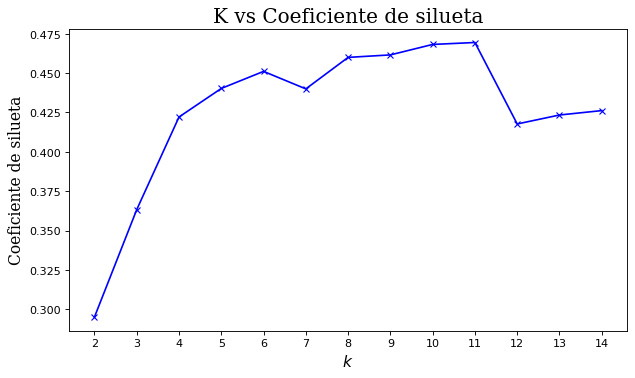

complete


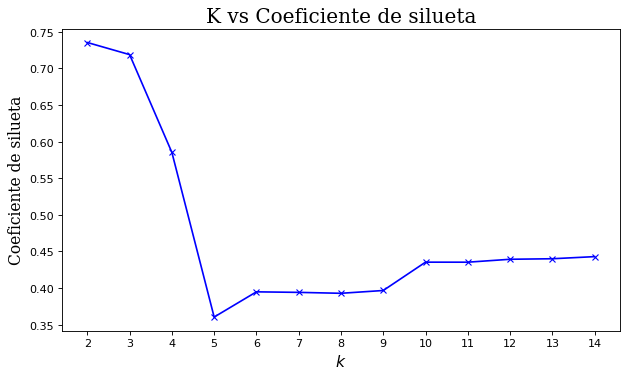

average


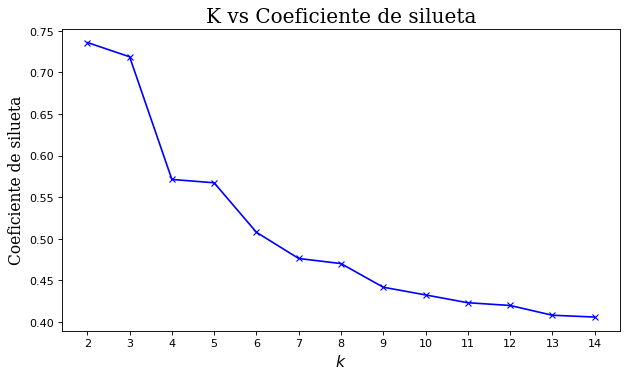

single


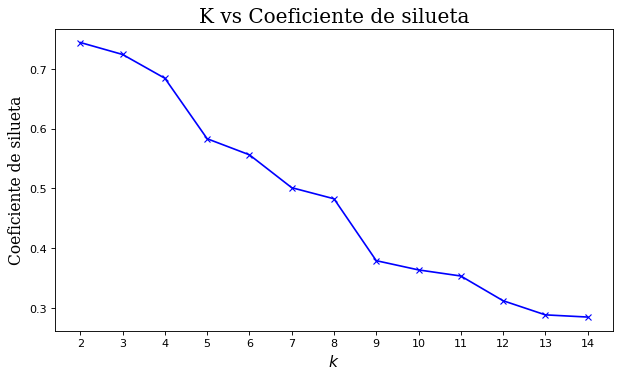

In [ ]:
from sklearn.cluster import AgglomerativeClustering
dict_silhouet = {}

K = range(2, 15)
for link in ['ward', 'complete', 'average', 'single']:
  silhouette = []
  for i in K:
    # Declaramos y ejecutamos el algoritmo.
    ac = AgglomerativeClustering(n_clusters=i, linkage=link) #'ward' según documentación la mas adecuada

    # Predecimos las etiquetas de X_No_correct_sc.
    y_etiquetas = ac.fit_predict(X_No_correct_sc)

    # Almacenamos la métrica de inercia y el coeficiente de silueta.
    silhouette.append(silhouette_score(X_No_correct_sc, y_etiquetas))
  dict_silhouet[link] = silhouette
  
silhou_max = []
for key in list(dict_silhouet.keys()):
  silhou_max.append(max(dict_silhouet[key]))
best = max(silhou_max)
max_silhou_linkage = dict(zip(list(dict_silhouet.keys()), silhou_max))
print(max_silhou_linkage)
print('Mejor linkage:', get_key(max_silhou_linkage, best), '=>', best)
for key in list(dict_silhouet.keys()):
  print(key)
  plot_metric(K, dict_silhouet[key], 'Coeficiente de silueta')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

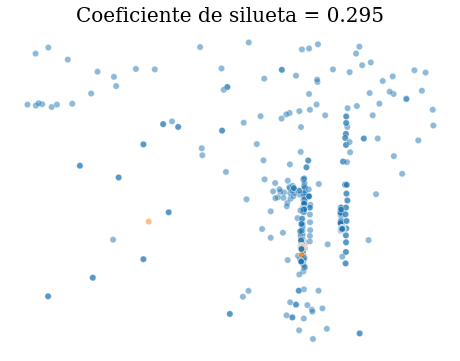

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

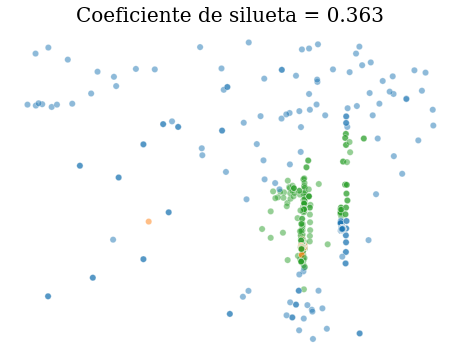

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

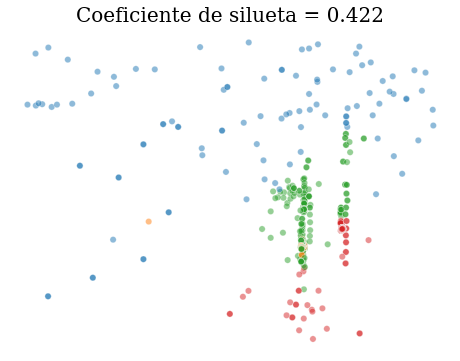

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

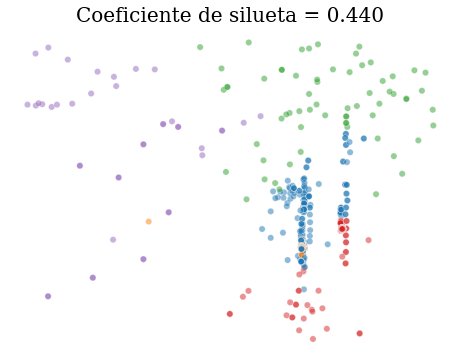

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

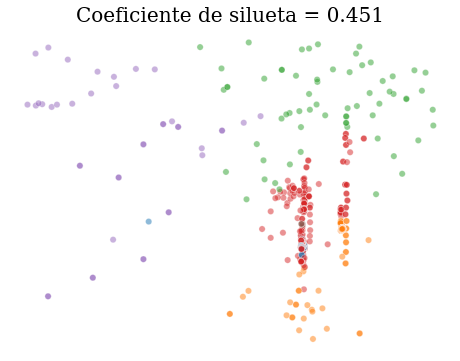

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

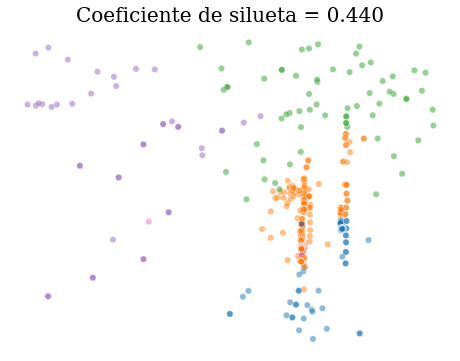

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

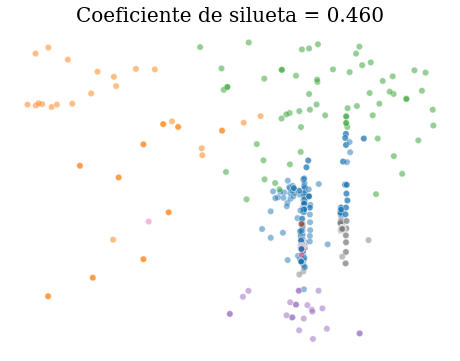

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

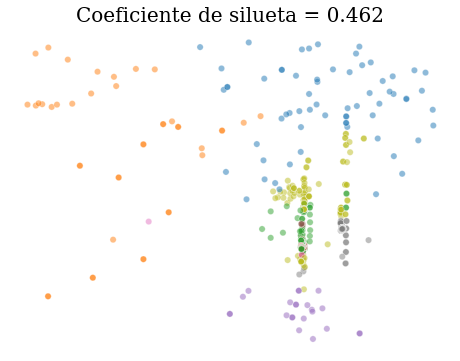

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

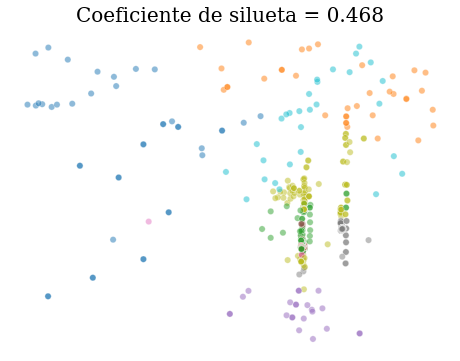

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

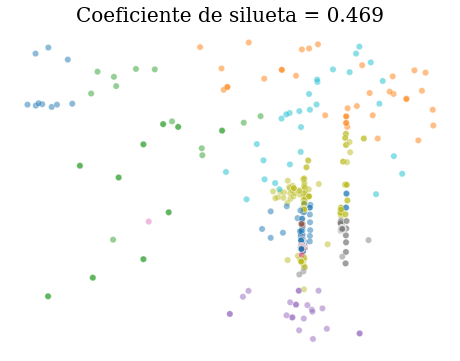

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

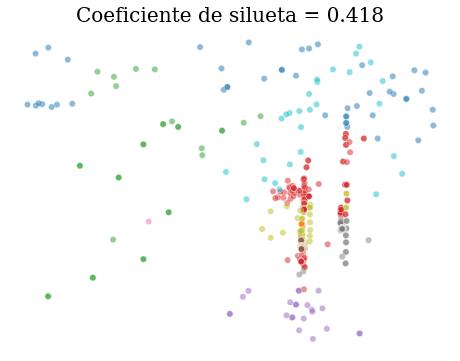

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

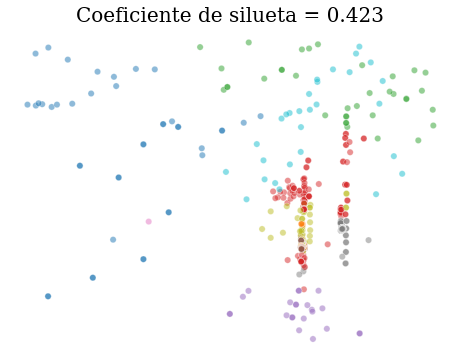

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

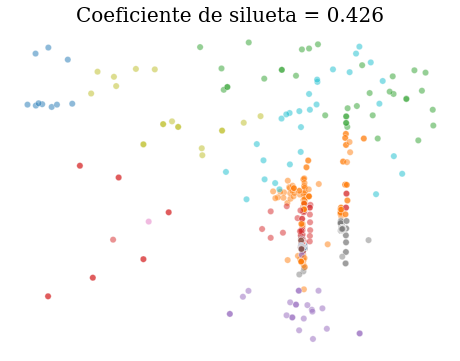

<IPython.core.display.Javascript object>

In [ ]:
experiment_number_of_clusters(X_No_correct_sc, AgglomerativeClustering(linkage="ward"), show_metric='silueta');

En principio se observa que al iterar con diferentes criterios de linkage *‘ward’, ‘complete’, ‘average’, ‘single’*, se encuentra que el mejor coeficiente de silueta (0.74) se obtiene con el criterio 'single' correspondiente a k = 2, sin embargo, al visualizar los datos geográficamente no se que éste agrupamiento sea útil e interpretable desde el punto de vista geológico.

Por otro lado, el criterio **'ward'** apesar de no presentar los coeficientes de silueta más altos, al observar los cluster desde el punto de vista geográfico, estos permiten una interpretación más lógica y por lo tanto este criterio es de mayor utilidad. Para este caso el coeficiente de silueta más alto (0.469) corresponde a k=11, sin embargo desde el punto de vista de interpretabilidad no es útil tener 11 clusters, sin embargo, la curva es bimodal por lo que se presenta un segundo pico en la curva (0.451) correspondiente a  **k = 6**, esta cantidad de clusters vistos geográficamente son parecen mostrar una mayor concordancia con el contexto geológico.

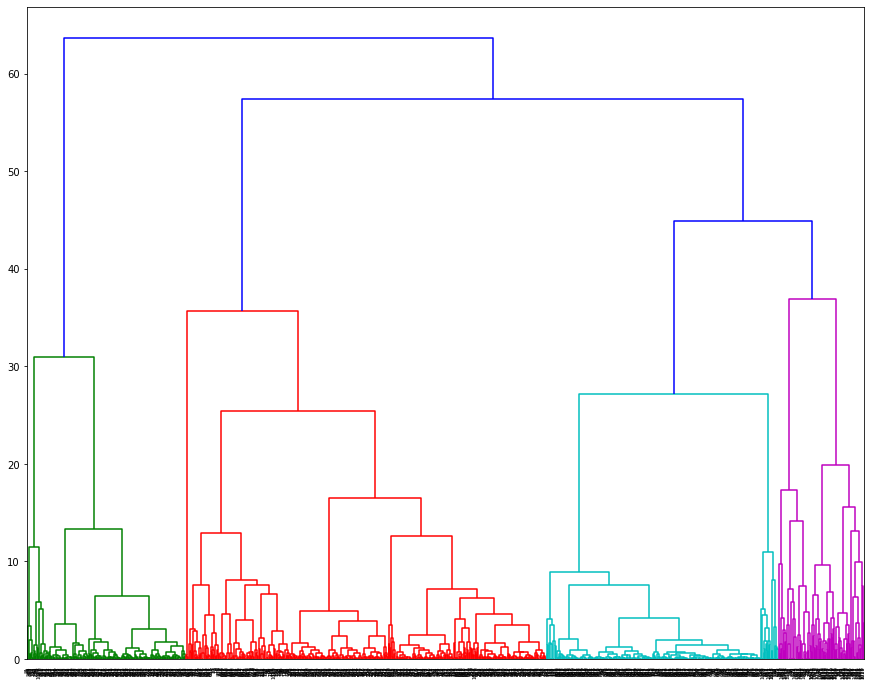

In [ ]:
from scipy.cluster.hierarchy import dendrogram

ac = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='ward') #'ward' según documentación la mas adecuada
# Predecimos las etiquetas de X_No_correct_sc.
model_fit = ac.fit(X_No_correct_sc)
plot_dendrogram(model_fit, (15, 12))

La elección del criterio 'ward' es ahora confirmado al visualizar el dendrograma correspondiente a cada uno de los criterios posibles; los dendrograma de los criterios ‘complete’, ‘average’ y ‘single’ son redundantes y no ayudan en la clasificación de las muestras del dataset, mientras que con el dendrograma realizado bajo el criterio  'ward' es posible la clara diferenciación de 4 grupos principales;
sugiriendo así la utilización de un parámetro de **k= 4**, restandole peso al  coeficiente de evaluación interna de silueta a la hora de evaluar un algoritmo de agrupamiento jerárquico.

X_No_correct_sc: k = 4


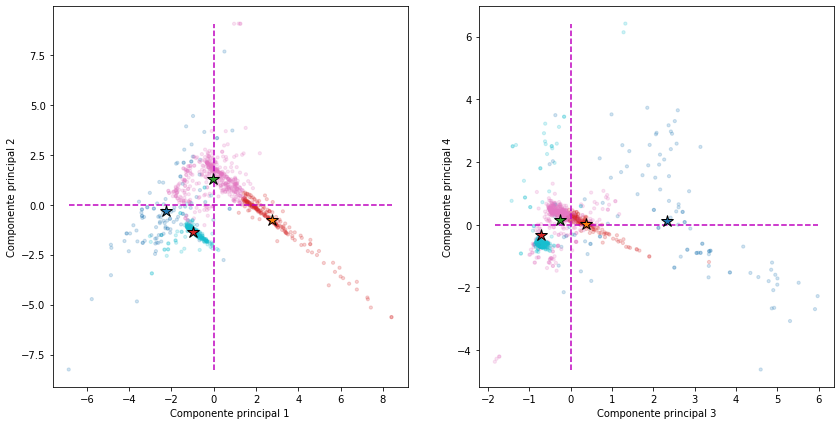

In [ ]:
from sklearn.neighbors import NearestCentroid

ac = AgglomerativeClustering(n_clusters=4, linkage='ward') #'ward' según documentación la mas adecuada
# Predecimos las etiquetas de X_No_correct_sc.
y_etiquetas = ac.fit_predict(X_No_correct_sc)
#obtenemos los centroides
clf = NearestCentroid()
clf.fit(X_No_correct_sc, y_etiquetas)
agglo_centroids = clf.centroids_

# convetimos los centroide al espacio latente para graficarlos
pca = PCA().fit(X_No_correct_sc) 
aggl_cent_laten = pca.transform(agglo_centroids)

print('X_No_correct_sc: k = 4')
X_Latente.shape

fig, axis = plt.subplots(1, 2, figsize = (14, 7))
ax0, ax1 = axis 

ax0.scatter(X_Latente[:, 0], X_Latente[:, 1], s= 10, c= y_etiquetas, marker='o', alpha=0.2, cmap= 'tab10')
ax0.set_xlabel('Componente principal 1')
ax0.set_ylabel('Componente principal 2')
ax0.vlines(0, min(X_Latente[:, 1]), max(X_Latente[:, 1]), colors='m', linestyles='dashed', label='PC 2')
ax0.hlines(0, min(X_Latente[:, 0]), max(X_Latente[:, 0]), colors='m', linestyles='dashed', label='PC 1')
for i in range(len(aggl_cent_laten)):
  ax0.plot(aggl_cent_laten[i][0], aggl_cent_laten[i][1], '*', mec='k', markersize=12)

ax1.scatter(X_Latente[:, 2], X_Latente[:, 3], s= 10, c= y_etiquetas, marker='o', alpha=0.2, cmap= 'tab10')
ax1.set_xlabel('Componente principal 3')
ax1.set_ylabel('Componente principal 4')
ax1.vlines(0, min(X_Latente[:, 3]), max(X_Latente[:, 3]), colors='m', linestyles='dashed', label='PC 2')
ax1.hlines(0, min(X_Latente[:, 2]), max(X_Latente[:, 2]), colors='m', linestyles='dashed', label='PC 1')
for i in range(len(aggl_cent_laten)):
  ax1.plot(aggl_cent_laten[i][2], aggl_cent_laten[i][3], '*', mec='k', markersize=12)


Finalmente visualizamos en el espacio latente los k = 4 clúster sugeridos por el dendrograma y es posible concluir que a pesar de que en términos de interpretabilidad es mucho mejor que k-means para el caso de los datos sin corrección geoestadística, debido que permite elegir un valor de k clusters más apropiado para los datos. Sin embargo al igual que k-means es muy sensible a zonas con gran densidad de muestreo  obteniendo así resultados muy semejantes en términos de concentración de mayor cantidad de clúster en zonas con mayor densidad de muestreo.

Ademas, la forma alargada de los datos representados en el espacio latente parece afectar el desempeño tanto de los algoritmos jerárquicos y de k-means, esto evidenciado en el clúster más alargado donde los dos clúster definidos por el método jerárquico (rosa y rojo) corresponden realmente a un solo clúster.

#### Dataset corregido

{'ward': 0.8329265872935784, 'complete': 0.8296098418824303, 'average': 0.8510983236987726, 'single': 0.8113875070101488}
Mejor linkage: average => 0.8510983236987726
ward


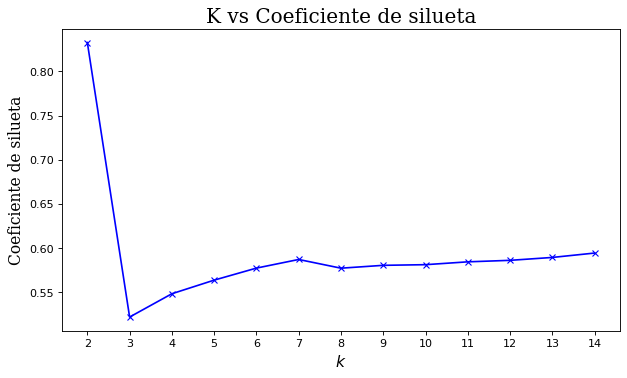

complete


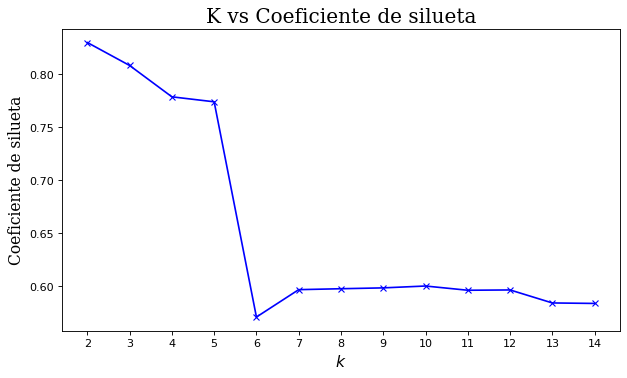

average


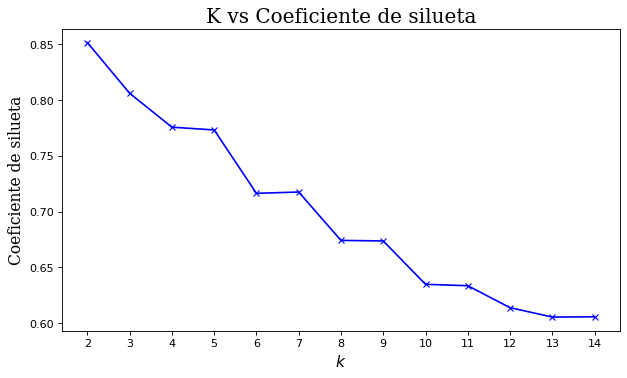

single


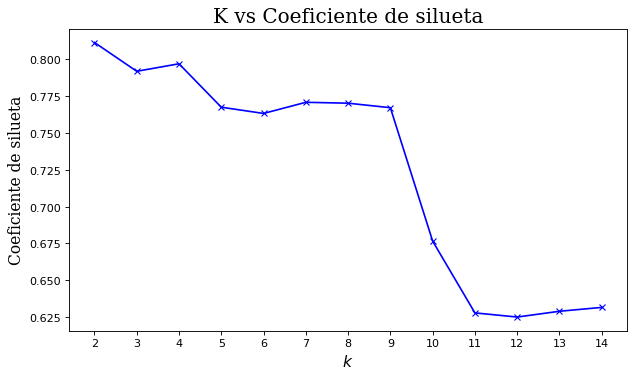

In [ ]:
dict_silhouet = {}

K = range(2, 15)
for link in ['ward', 'complete', 'average', 'single']:
  silhouette = []
  for i in K:
    # Declaramos y ejecutamos el algoritmo.
    ac = AgglomerativeClustering(n_clusters=i, linkage=link) #'ward' según documentación la mas adecuada

    # Predecimos las etiquetas de X_correct_sc.
    y_etiquetas = ac.fit_predict(X_correct_sc)

    # Almacenamos la métrica de inercia y el coeficiente de silueta.
    silhouette.append(silhouette_score(X_correct_sc, y_etiquetas))
  dict_silhouet[link] = silhouette
  
silhou_max = []
for key in list(dict_silhouet.keys()):
  silhou_max.append(max(dict_silhouet[key]))
best = max(silhou_max)
max_silhou_linkage = dict(zip(list(dict_silhouet.keys()), silhou_max))
print(max_silhou_linkage)
print('Mejor linkage:', get_key(max_silhou_linkage, best), '=>', best)
for key in list(dict_silhouet.keys()):
  print(key)
  plot_metric(K, dict_silhouet[key], 'Coeficiente de silueta')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

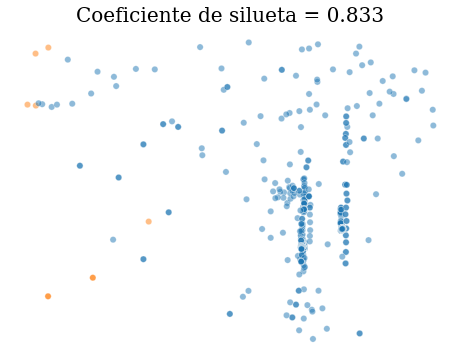

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

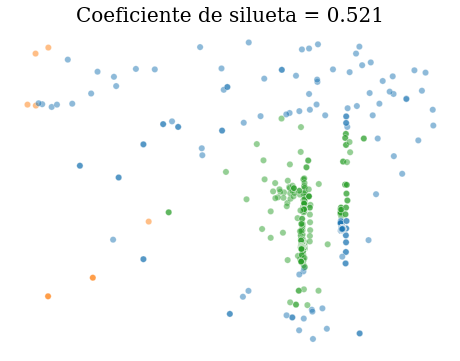

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

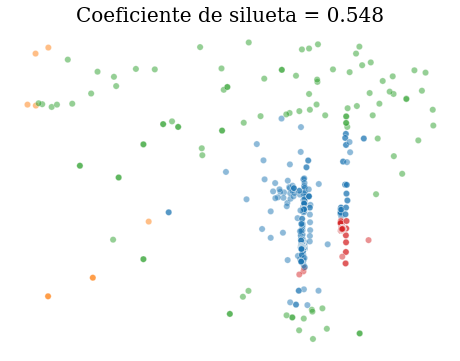

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

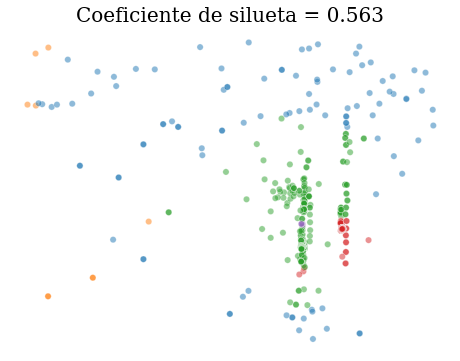

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

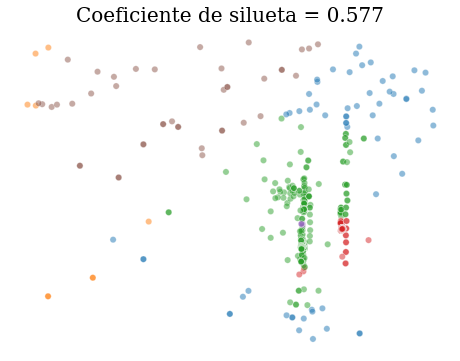

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

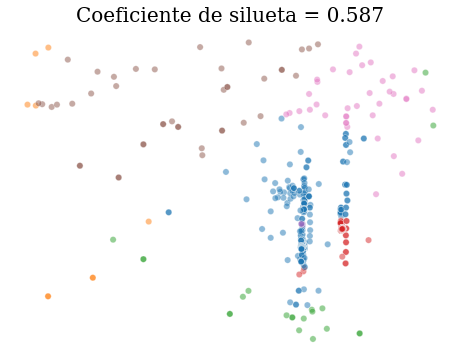

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

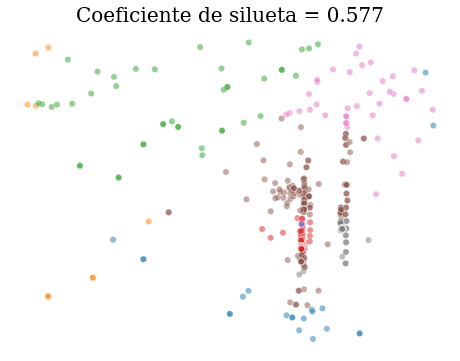

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

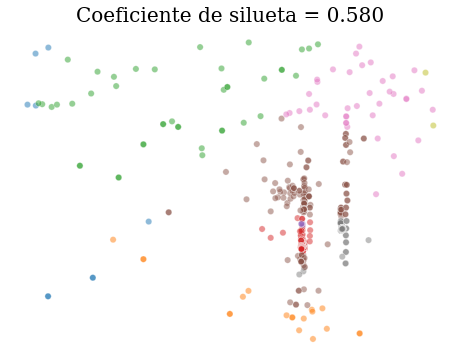

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

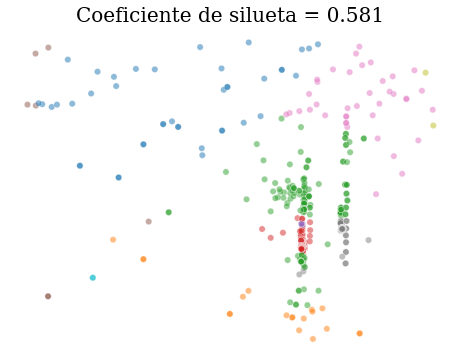

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

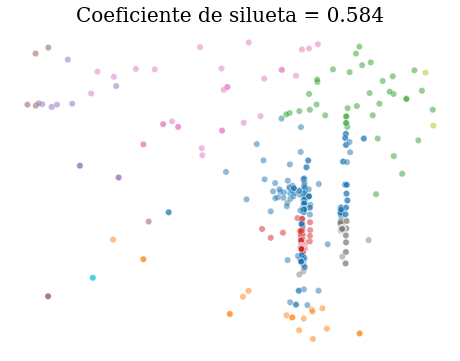

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

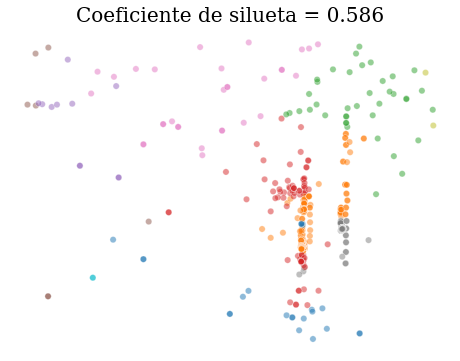

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

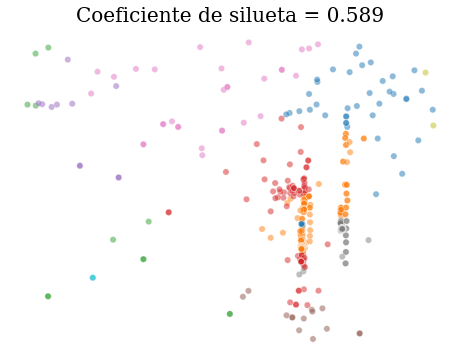

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

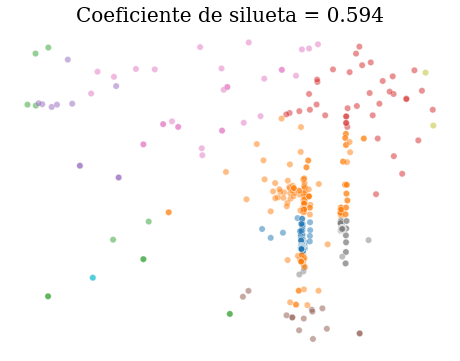

<IPython.core.display.Javascript object>

In [ ]:
experiment_number_of_clusters(X_correct_sc, AgglomerativeClustering(linkage="ward"), show_metric='silueta');

Al aplicar el coeficiente de silueta para el dataset con corrección estadística para cada uno de los criterios de linkage del método ‘ward’, ‘complete’, ‘average’, ‘single’ y observar las curvas de silueta vs. k clúster, no es muy diciente en el sentido que no hay mucha certeza de que k es el mejor, esto debido a que el máximo valor de silueta se alcanza cuando k =2, esto para cada uno de los criterios, sin embargo al visualizar esto geográficamente se puede concluir que no aporta ninguna información valiosa tener dos clúster, por otro lado curvas cuya tendencia es descendente  sin segundos picos como en el caso del criterio ‘average’ permiten descartar este criterio. Para el caso de curvas con segundos picos como en el caso de ‘ward’, ‘complete’ y ‘single’ podemos ver un consenso a presentar valores de silueta localmente altos para valores de k entre 7 y 8 aproximadamente. 

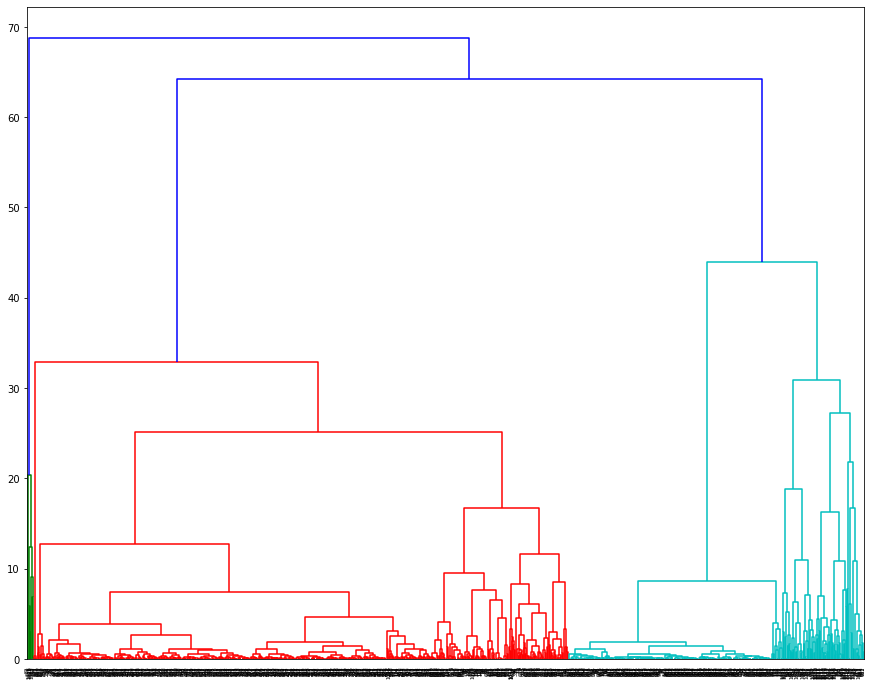

In [ ]:
from scipy.cluster.hierarchy import dendrogram

ac = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='ward') #'ward' según documentación la mas adecuada
# Predecimos las etiquetas de X_correct_sc.
model_fit = ac.fit(X_correct_sc)
plot_dendrogram(model_fit, (15, 12))

Al visualizar el dendrograma  asociado al dataset nuevamente es posible confirmar que el criterio ‘ward’ es el mejor para este caso, dado que permite diferencias mejor entre un numero razonable de clúster; se puede observar que el dendrograma sugiera la elección de un numero k = 3 o 4, que al visualizarlos geográficamente podemos concluir que guardan una mejor concordancia con el contexto geológico. Una vez más podemos confirmar que la elección del numero de clúster k se facilita al visualizar el dendrograma bajo el criterio adecuado para el caso de métodos jerárquicos por encima del coeficiente de silueta que en este caso específico no aporta gran información.

X_correct_sc: k = 3


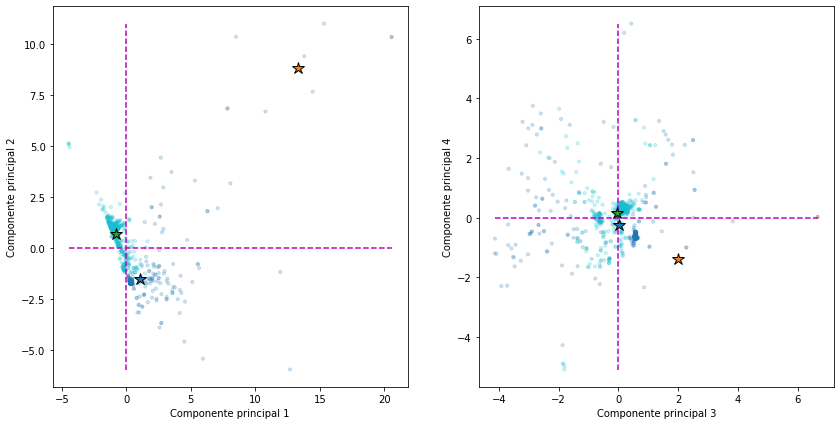

In [ ]:
ac = AgglomerativeClustering(n_clusters=3, linkage='ward') #'ward' según documentación la mas adecuada
# Predecimos las etiquetas de X_correct_sc.
y_etiquetas_cr = ac.fit_predict(X_correct_sc)
#obtenemos los centroides
clf = NearestCentroid()
clf.fit(X_correct_sc, y_etiquetas_cr)
agglo_centroids = clf.centroids_

# convetimos los centroide al espacio latente para graficarlos
pca = PCA().fit(X_correct_sc) 
aggl_cent_laten = pca.transform(agglo_centroids)

print('X_correct_sc: k = 3')
X_Latente.shape

fig, axis = plt.subplots(1, 2, figsize = (14, 7))
ax0, ax1 = axis 

ax0.scatter(Xc_Latente[:, 0], Xc_Latente[:, 1], s= 10, c= y_etiquetas_cr, marker='o', alpha=0.2, cmap= 'tab10')
ax0.set_xlabel('Componente principal 1')
ax0.set_ylabel('Componente principal 2')
ax0.vlines(0, min(Xc_Latente[:, 1]), max(Xc_Latente[:, 1]), colors='m', linestyles='dashed', label='PC 2')
ax0.hlines(0, min(Xc_Latente[:, 0]), max(Xc_Latente[:, 0]), colors='m', linestyles='dashed', label='PC 1')
for i in range(len(aggl_cent_laten)):
  ax0.plot(aggl_cent_laten[i][0], aggl_cent_laten[i][1], '*', mec='k', markersize=12)

ax1.scatter(Xc_Latente[:, 2], Xc_Latente[:, 3], s= 10, c= y_etiquetas_cr, marker='o', alpha=0.2, cmap= 'tab10')
ax1.set_xlabel('Componente principal 3')
ax1.set_ylabel('Componente principal 4')
ax1.vlines(0, min(Xc_Latente[:, 3]), max(Xc_Latente[:, 3]), colors='m', linestyles='dashed', label='PC 2')
ax1.hlines(0, min(Xc_Latente[:, 2]), max(Xc_Latente[:, 2]), colors='m', linestyles='dashed', label='PC 1')
for i in range(len(aggl_cent_laten)):
  ax1.plot(aggl_cent_laten[i][2], aggl_cent_laten[i][3], '*', mec='k', markersize=12)


De manera que para hacer una clasificación adecuada al contexto geológico se decide generar las etiquetas de los clúster mediante la aplicación del mejor modelo encontrado hasta ahora; **agglomerative clustering con k = 3 y criterio ‘ward’** al dataset con corrección geoestadística. Para posteriormente asociar dichas etiquetas al dataset original (sin corrección).

### Arbol de decisión
---


In [ ]:
#definimos el mejor modelo de agrupamiento encontrado
ac = AgglomerativeClustering(n_clusters=3, linkage='ward') #'ward' según documentación la mas adecuada

#utilizamos los datos originales sin corrección
X = X_No_correct_sc 

#utilizamos las etiquetas obtenidas con el metodo jerarquico 
#aplicado al dataset con corrección geoestadistica
y = ac.fit_predict(X_correct_sc)
print(f'X shape:{X.shape} \ny shape: {y.shape}' )


X shape:(1049, 9) 
y shape: (1049,)


X_No_correct_sc: k = 3


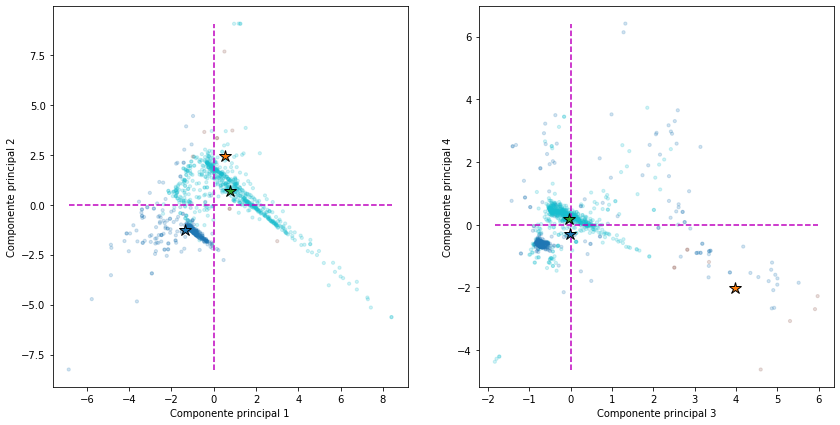

In [ ]:
ac = AgglomerativeClustering(n_clusters=3, linkage='ward')
X = X_No_correct_sc 
y = ac.fit_predict(X_correct_sc)
#obtenemos los centroides
clf = NearestCentroid()
clf.fit(X_No_correct_sc, y)
centroids = clf.centroids_

# convetimos los centroide al espacio latente para graficarlos
pca = PCA().fit(X_No_correct_sc) 
laten_centrod = pca.transform(centroids)

print('X_No_correct_sc: k = 3')
X_Latente.shape

fig, axis = plt.subplots(1, 2, figsize = (14, 7))
ax0, ax1 = axis 

ax0.scatter(X_Latente[:, 0], X_Latente[:, 1], s= 10, c= y, marker='o', alpha=0.2, cmap= 'tab10')
ax0.set_xlabel('Componente principal 1')
ax0.set_ylabel('Componente principal 2')
ax0.vlines(0, min(X_Latente[:, 1]), max(X_Latente[:, 1]), colors='m', linestyles='dashed', label='PC 2')
ax0.hlines(0, min(X_Latente[:, 0]), max(X_Latente[:, 0]), colors='m', linestyles='dashed', label='PC 1')
for i in range(len(laten_centrod)):
  ax0.plot(laten_centrod[i][0], laten_centrod[i][1], '*', mec='k', markersize=12)

ax1.scatter(X_Latente[:, 2], X_Latente[:, 3], s= 10, c= y, marker='o', alpha=0.2, cmap= 'tab10')
ax1.set_xlabel('Componente principal 3')
ax1.set_ylabel('Componente principal 4')
ax1.vlines(0, min(X_Latente[:, 3]), max(X_Latente[:, 3]), colors='m', linestyles='dashed', label='PC 2')
ax1.hlines(0, min(X_Latente[:, 2]), max(X_Latente[:, 2]), colors='m', linestyles='dashed', label='PC 1')
for i in range(len(laten_centrod)):
  ax1.plot(laten_centrod[i][2], laten_centrod[i][3], '*', mec='k', markersize=12)



Los datos sin corrección geoestadística vistos en el espacio latente con los clúster derivados a partir del dataset corregido mediante métodos jerárquicos parece representar mucho mejor la naturaleza de las nubes de datos, las cuales son alargadas en los dos dominios asociados a una mayor densidad de muestreo, a pesar de que todos los algoritmos supervisados son sensibles a zonas de mayor densidad muestral, sólo por medio de la metodología utilizada fue posible modelar la naturaleza particular de los principales clúster vistos en el espacio latente.

In [ ]:
from sklearn.model_selection import train_test_split

Scale_fit = StandardScaler().fit(df_No_correct.values)
X = Scale_fit.inverse_transform(X) #hacemos la inversa de la normalización

y = ac.fit_predict(X_correct_sc)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 31, stratify= y)

print(f'X_train: {X_train.shape} & y_train {y_train.shape}')
print(f'X_test: {X_test.shape} & y_test: {y_test.shape}')

X_train: (734, 9) & y_train (734,)
X_test: (315, 9) & y_test: (315,)


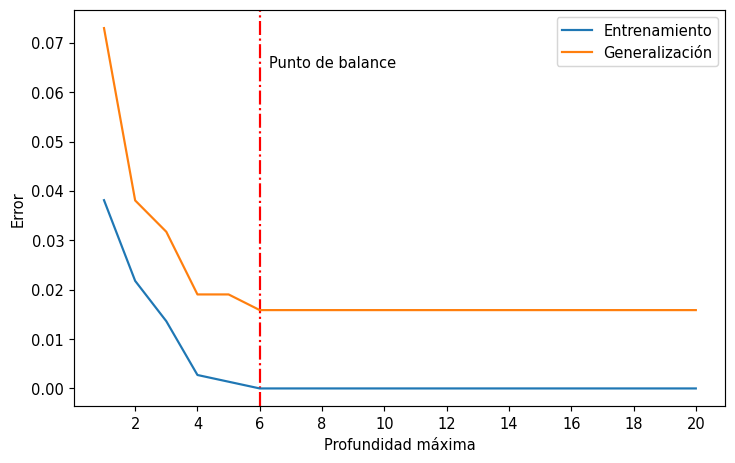

In [ ]:
# Importamos el constructor del clasificador por árboles de decisión.
from sklearn.tree import DecisionTreeClassifier

# Números enteros de 1 a 20 como posibles valores del hiperparámetro de profundidad.
max_depth_values = np.arange(1, 21, 1)

# Arreglos vacíos para almacenar el error de entrenamiento y el de generalización.
train_error = np.empty(len(max_depth_values))
generalization_error = np.empty(len(max_depth_values))


for depth in max_depth_values:
    # Entrenamos un árbol de decisión para cada valor de profundidad.
    decision_tree = DecisionTreeClassifier(random_state= 31, max_depth=depth)
    decision_tree.fit(X_train, y_train)

    # Almacenamos el error de entrenamiento y de generalización por cada árbol.
    train_error[depth - 1] = (1 - decision_tree.score(X_train, y_train))
    generalization_error[depth - 1] = (1 - decision_tree.score(X_test, y_test))

plot_learning_curve(train_error, generalization_error)

Entrenamos el árbol de decisión para diferentes niveles del parámetro profundidad para explorar el valor más adecuado, esto se realiza mediante la visualización de las curvas de error de generalización y entrenamiento, con el fin de encontrar el punto de balance entre el subajuste y el sobreajuste para definir el modelo de árbol de decisión que mejor generalice. Para este caso se encuentra que el mejor valor de profundidad es 6.

#### GridsearchCV
---

In [ ]:
# Búsqueda en cuadrícula de hiperparámetros.
from sklearn.model_selection import GridSearchCV 

param_grid = {'criterion': ['gini', 'entropy'], 
              'splitter': ['best', 'random'],
              'max_depth': list(np.arange(1, 21, 1)),
              'max_leaf_nodes': list(range(2, 50)),
              'min_samples_split': [2, 3, 4],
              'max_features': [None, 'auto', 'sqrt', 'log2']}

grid_clf = GridSearchCV(DecisionTreeClassifier(random_state= 31), 
                   param_grid=param_grid, 
                   verbose=3,
                   cv = 5, 
                   return_train_score=True
                   )

grid_clf.fit(X_train, y_train)
    

Se truncaron las últimas líneas 5000 del resultado de transmisión.
[CV 1/5] END criterion=entropy, max_depth=20, max_features=None, max_leaf_nodes=27, min_samples_split=3, splitter=best;, score=(train=1.000, test=0.993) total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=20, max_features=None, max_leaf_nodes=27, min_samples_split=3, splitter=best;, score=(train=1.000, test=0.973) total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=20, max_features=None, max_leaf_nodes=27, min_samples_split=3, splitter=best;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=20, max_features=None, max_leaf_nodes=27, min_samples_split=3, splitter=best;, score=(train=1.000, test=0.959) total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=20, max_features=None, max_leaf_nodes=27, min_samples_split=3, splitter=best;, score=(train=1.000, test=0.979) total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=20, max_features=None, max_leaf

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=31),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ['best', 'random']},
             return_train_score=True, verbose=3)

In [ ]:
print(grid_clf.best_estimator_)
print(grid_clf.best_score_)
print(grid_clf.best_params_)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=12, random_state=31)
0.9850246948094306
{'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': 12, 'min_samples_split': 2, 'splitter': 'best'}


**Los mejores parámetros según GridsearchCV son:**

`DecisionTreeClassifier(max_depth=6, max_leaf_nodes=12, random_state=31)`

`0.9850246948094306`

`{'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': 12, 'min_samples_split': 2, 'splitter': 'best'}`

Curva_GridsearchCV


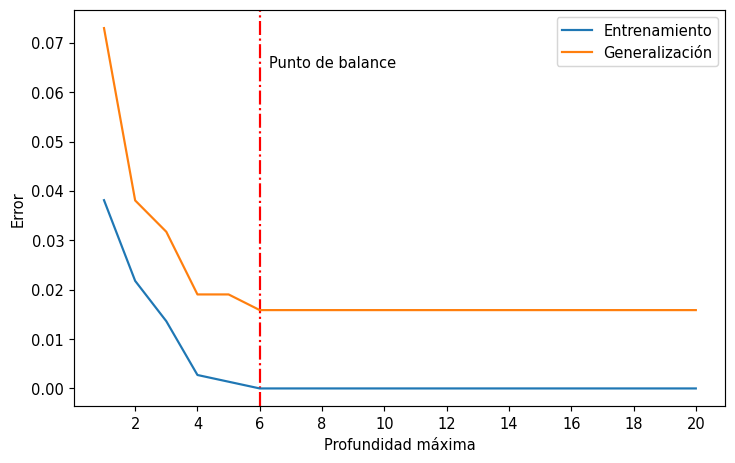

In [ ]:
# Importamos el constructor del clasificador por árboles de decisión.
from sklearn.tree import DecisionTreeClassifier

# Números enteros de 1 a 20 como posibles valores del hiperparámetro de profundidad.
max_depth_values = np.arange(1, 21, 1)

# Arreglos vacíos para almacenar el error de entrenamiento y el de generalización.
train_error = np.empty(len(max_depth_values))
generalization_error = np.empty(len(max_depth_values))


for depth in max_depth_values:
    # Entrenamos un árbol de decisión para cada valor de profundidad.
    decision_tree = DecisionTreeClassifier(random_state= 31,
                                           max_depth=depth,
                                           max_leaf_nodes= 12)
    decision_tree.fit(X_train, y_train)

    # Almacenamos el error de entrenamiento y de generalización por cada árbol.
    train_error[depth - 1] = (1 - decision_tree.score(X_train, y_train))
    generalization_error[depth - 1] = (1 - decision_tree.score(X_test, y_test))
print('Curva_GridsearchCV')
plot_learning_curve(train_error, generalization_error)

Por medio de una búsqueda exhaustiva de hiperparámetros (Gridsearch) con validación cruzada 5 fold; para los parametros de ‘criterion’, ‘splitter’, ‘max_depth’, ‘max_leaf_nodes’, ‘min_samples_split’ y ‘max_features’, se encontró que la mejor configuración de hiperparámetros, para el modelo de árbol de decisión, corresponde a:

`criterion = 'gini', max_depth = 6, max_features = None, max_leaf_nodes =  12, min_samples_split = 2, splitter = 'best'`

 Ademas del parámetro de profundidad 6 que ya había sido hallado, la cantidad de nodos hoja más óptima es de 12.

#### Visualización
---

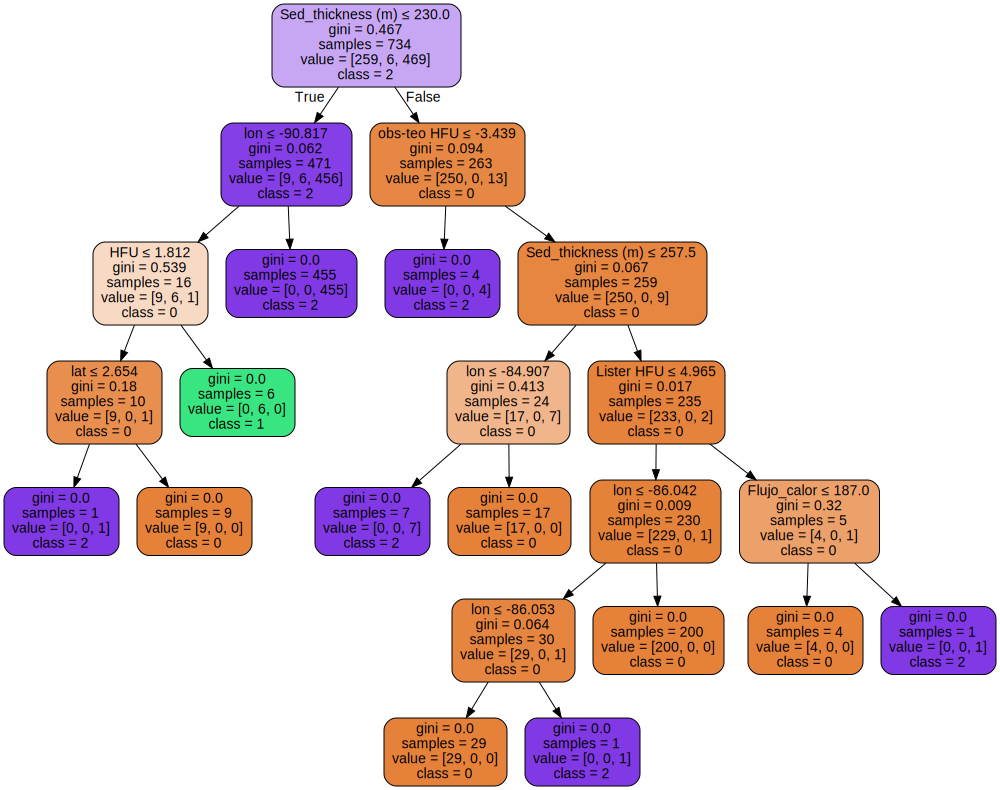

In [ ]:
# Función de utilidad para la visualización de archivos SVG en notebooks.
from IPython.display import SVG

# Importamos la función de generación del archivo de descripción del árbol.
from sklearn.tree import export_graphviz
decision_tree = DecisionTreeClassifier(random_state= 31,
                                           max_depth= 6,
                                           max_leaf_nodes= 12)

Tree_trained = decision_tree.fit(X_train, y_train)

graphviz_data = export_graphviz(Tree_trained, # Árbol de decisión entrenado.
                                out_file=None,      # Se usa 'None' para generar un string con el resultado.
                                feature_names= list(df_No_correct.columns),  # Nombre de las características.
                                class_names= [str(clust) for clust in np.unique(y)],     # Nombre de las clases.
                                 # Configuración de estilo.
                                filled=True, rounded=True, special_characters=True)  

# Generamos el grafo de graphviz para la visualización.
graph = graphviz.Source(graphviz_data)

# Exportamos en formato svg y visualizamos con IPython.
SVG(graph.pipe(format='svg'))
#gini =  indice de impureza, valor ideal cero =  cero impureza

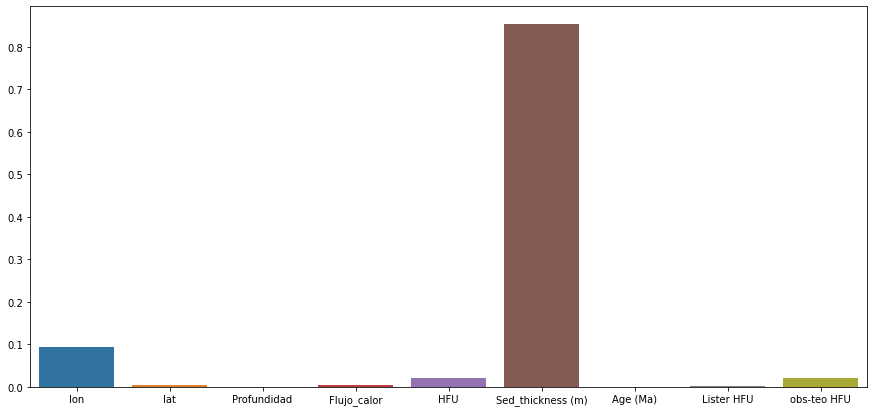

In [ ]:
#Tree_trained.feature_importances_
fig, axes = plt.subplots(1, 1, figsize= (15, 7))
sns.barplot(x = list(df_No_correct.columns),  # Nombre de las características.
            y = Tree_trained.feature_importances_,
            ax= axes); # Importancia de cada característica.

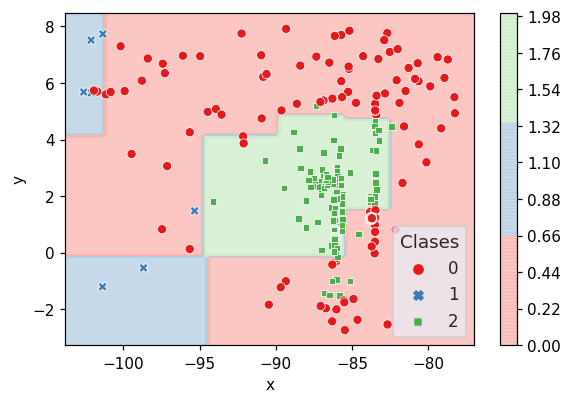

In [ ]:
#datos
X = df_No_correct.values
#etiquetas
y = ac.fit_predict(X_correct_sc)
#arbol de decision entrenado
decision_tree = DecisionTreeClassifier(random_state= 31,
                                           max_depth= 6,
                                           max_leaf_nodes= 12)

Tree_trained = decision_tree.fit(X_train[:, :2], y_train)
#print(X.shape)
plot_data(X, y, model = Tree_trained)

Visualizando el árbol de decisión podemos concluir que la variable que tuvo mayor relevancia a la hora de clasificar los datos en los clúster definidos fue el *grosor sedimentario, seguido de la coordenada de longitud y el flujo de calor*. Estos hallazgos son interesante desde el punto de vista geofísico dado que siempre se han realizado modelos que relacionan las variables de flujo de calor y edad de la corteza oceánica, estos modelos clásicos no logran modelar bien el flujo de calor en zonas cercana a rift oceánicos, en los últimos años se ha señalado que en estos casos las corrientes hidrotermales juegan un papel que no ha sido posible de modelar, ademas que esta influencia depende del **grosor sedimentario** ya que este puede determinar el mecanismo de transferencia de calor, por lo que al parecer el **umbral de 230 m** de grosor sedimentario, señalado en el árbol de decisión, puede determinar la transición de un dominio térmico **convectivo** influenciado por actividad hidrotermal hacia uno más **conductivo** donde la refracción térmica es el fenómeno dominante.


#### Evaluación de Desempeño
---

In [ ]:
from sklearn.metrics import classification_report

decision_tree = DecisionTreeClassifier(random_state= 31,
                                           max_depth= 6,
                                           max_leaf_nodes= 12)

Tree_trained = decision_tree.fit(X_train, y_train)

y_pred = Tree_trained.predict(X_test)
report = classification_report(y_test, y_pred, digits= 4)
print(report)

              precision    recall  f1-score   support

           0     0.9732    0.9820    0.9776       111
           1     0.7500    1.0000    0.8571         3
           2     0.9950    0.9851    0.9900       201

    accuracy                         0.9841       315
   macro avg     0.9061    0.9890    0.9416       315
weighted avg     0.9850    0.9841    0.9844       315



In [ ]:
# Generamos y mostramos la matriz de confusión.
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred)  
list_confusion_matrix(mat, [str(clust) for clust in np.unique(y)]) 

Valor predicho        
                          0  1    2
Valor real 0            109  1    1
           1              0  3    0
           2              3  0  198

In [ ]:
print('Entrenamiento','\nCluster 0:', list(y_train).count(0), '\nCluster 1:', list(y_train).count(1), '\nCluster 2:', list(y_train).count(2))

Entrenamiento 
Cluster 0: 259 
Cluster 1: 6 
Cluster 2: 469


Se observa que el modelo en general tiene una precisión alta de 98.4%, de manera local el modelo representa una precisión alta (97.3% y 99.5%) para clasificar clúster las categorías 0 y 2, mientras que para el clúster 1 presenta una precisión mejor de 75%, respecto al recall o tasa de verdaderos positivos se observa que para todos los clúster es muy alta, mientras que la métrica de F1-score es alta para los clúster 0 y 2 (97.7% y 99%) mientras que para el clúster 1 es un poco menor (85.7%) .

La razon por la cual las métricas de desempeño fueron más bajas para el cluster 1, se explica con la poca cantidad de muestras de esta categoría durante el entrenamiento:

* Cluster 0: 259 
* Cluster 1: 6 
* Cluster 2: 469

De la misma manera esto explica que las métricas de desempeño hayan sido altas para el clúster 2 dado que la mayoría de muestras fueron de esta categoría durante el entrenamiento.  Este **sesgo de clases** probablemente se debe al sesgo espacial de los datos, característica que mostró una gran influencia en todos los modelo de de agrupamiento no supervisado utilizados durante el proyecto, de manera que datos que no tengan una la distribución geográfica aleatoria ni tampoco uniforme van a generar un desequilibrio de clases durante el agrupamiento o clustering.

A pesar de que se exploró una metodología geoestadística para corregir este hecho, está aunque dio mejores resultados comparado con los datos que no tenían este tratamiento, continua teniendo dificultades en el balance de clases, por lo que zonas con mayor densidad de muestreo tendrán un clúster de mayor tamaño comparado con zonas de baja densidad, repercutiendo en el proceso de entrenamiento supervisado (árboles de decisión) y finalmente en la métrica de evaluación. 


## Conclusiones
---

1. Desde el punto de vista de evaluación interna y durante la decisión de la cantidad de clusters k a utilizar, en un modelo de agrupamiento jerárquico es mucho mas útil basarse en un dendrograma que en el coeficiente de silueta.

2. Los métodos jerárquicos parecen ser más convenientes comparados con k-means a la hora de escoger la cantidad de k cluster para datos con sesgo espacial , sin embargo para nubes de datos con geometrías largadas parece presentar dificultades a la hora de clasificarlas en clúster al igual que k-means.

3. La corrección geoestadística ‘declustering’ como tratamiento presente en el preprocesamiento de los datos, tiene el efecto de modificar la geometría la nube de datos vista en el espacio latente, de manera que nubes con geometría alargada donde la distancia entre los datos de cada extremo es muy grande, es modificada en términos de escala  generando nubes con geometría más globulares, lo que facilita el desempeño de cualquiera de los algoritmos utilizados en este proyecto.

4. Una manera más efectiva de modelar clúster con geometrías alargadas, es utilizar algoritmos de aprendizaje de máquina no supervisados de carácter jerárquico (Agglomerative clustering); para la definición de los k clúster más adecuados. Ademas, durante el proyecto fue evidente que es clave aplicarlos a un conjunto de datos con un preprocesamiento que involucre corrección geoestadística para sesgo espacial ‘declustering’, esto sólo con el fin de obtener etiquetas o clúster que modelen mejor estas nubes de datos de geometría alargada,  para finalmente asociarlas a el conjunto de datos sin corrección geoestadística con fines de un posterior modelado de carácter supervisado como Arboles de decisión.

5. A pesar de que la corrección geoestadística aplicada en el preprocesamiento mejora el moldeamiento de clúster alargados con métodos jerárquicos, no soluciona el desbalance de clases generado al tener clúster de gran tamaño en zonas con mayor densidad de muestreo, esto ademas repercute en el entrenamiento de modelos supervisados (árboles de decisión) generando un desbalance en la clases y por tanto un nuevo sesgo.


## Bibliografía
---
* Meschede, M. & U. Barckhausen (2000). “Plate tectonic evolution of the Cocos-Nazca spreading center”. In: Scientific Results Proceedings of the Ocean Drilling Program Fluid, Mass and Thermal Fluxes in the Pacific Margin of Costa Rica Sites 1039-1043. Vol. 170. November. Arlington: Ocean Drilling Program. Chap. 7, pp. 1–10. DOI : 10 . 2973 / odp .proc.sr.170.009.2000. URL : http://www-odp.tamu.edu/publications/170%7B%5C_%7DSR/VOLUME/CHAPTERS/SR170%7B%5C_%7D07.PDF.

* Lonsdale, Peter & Kim D. Klitgord (1978). “Structure and tectonic history of the eastern Panama Basin”. In: Bulletin of the Geological Society of America 89.7, pp. 981–999. ISSN: 19432674.DOI: 10.1130/0016-7606(1978)89<981:SATHOT>2.0.CO;2. 

* Müller, R. Dietmar et al. (2008). “Age, spreading rates, and spreading asymmetry of the world’s ocean crust”. In: Geochemistry, Geophysics, Geosystems 9.4, n/a–n/a. ISSN: 15252027. DOI: 10.1029/2007GC001743. URL: http://doi.wiley.com/10.1029/2007GC001743.

* Pollack, Henry N., Suzanne J. Hurter, & Jeffrey R. Johnson (1993). “Heat flow from the Earth’s interior: Analysis of the global data set”. In: Reviews of Geophysics 31.3, pp. 267–280.ISSN: 19449208.DOI: 10.1029/93RG01249.

* Straume, E. O. et al. (2019). “GlobSed: Updated Total Sediment Thickness in the World’s Oceans”. In: Geochemistry,Geophysics, Geosystems 20.4,pp. 1756–1772. ISSN : 1525-2027. DOI : 10.1029/2018GC008115. URL:https://onlinelibrary.wiley.com/doi/abs/10.1029/2018GC008115.

* Van Andel, Tjeerd H. et al. (1971). Tectonics of the Panama basin, eastern Equatorial Pacific”. In: Bulletin of the Geological Society of America 82.6, pp.1489–1508.ISSN: 19432674.DOI: 10.1130/0016-7606(1971)82[1489:TOTPBE]2.0.CO;2.

